# AWCA Presentation

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import LogFormatter

### 2) Data Import and Export (REQUIRED)

#### Define Functions for Data Import and Export (Required)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")

#### OPTION 1) Import Data from Excel Macro

In [16]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 07-19-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### Figures Settings

In [17]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26

# Set default font size for title, labels, and legend
plt.rcParams['axes.titlesize'] = 34  # Set the font size for plot titles
plt.rcParams['axes.labelsize'] = 28  # Set the font size for axis labels
plt.rcParams['legend.fontsize'] = 24  # Set the font size for legend
plt.rcParams['legend.title_fontsize'] = 24  # Set the font size for legend

# Set default font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Set default font type for plot titles to bold
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

### 3) Import Other Data

In [5]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [6]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

In [7]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['New_RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['New_RGB'])}

### PFAS at WRRFs by Sample Type

#### Functions

In [353]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, start_date=None, end_date=None, aggfunc='mean',):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean'). Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values="Quant Incl Estimates Incl Qual Flags",
                                     index='PFAS Compound', columns='Type',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [354]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [355]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, selected_compound, title=None, ylabel='Concentration (ng/L)', secondary_ylabel='Specific PFAS Concentration (ng/g)', figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups (PFAS compounds) and columns as subgroups (sample types),
    including error bars. Optionally plot a specific PFAS compound on a secondary y-axis.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        selected_compound (str): Specific PFAS compound to plot on a secondary y-axis.
        title (str, optional): The title for the chart.
        ylabel (str, optional): Label for the primary y-axis.
        secondary_ylabel (str, optional): Label for the secondary y-axis.
        figsize (tuple, optional): Figure size.
        colors (dict, optional): Dictionary of colors for each sample type.
        title_fontsize (int), axis_label_fontsize (int), tick_label_fontsize (int), legend_fontsize (int): Font sizes.
    """
    font_bold = FontProperties(family='Arial', weight='bold')

    # Create plot
    fig, ax = plt.subplots(figsize=figsize or (12, 8))
    ax2 = ax.twinx() if selected_compound else None

    subgroups = avg_pivot_table.columns
    num_subgroups = len(subgroups)
    bar_width = 0.2
    gap = 0.05
    group_width = num_subgroups * (bar_width + gap) - gap

    # Adjust x-ticks to center the middle bar of each group
    x_ticks = np.arange(len(avg_pivot_table)) * (group_width + gap * 2) + group_width / 2 - bar_width / 2

    # Plot bars
    for i, (compound, data_row) in enumerate(avg_pivot_table.iterrows()):
        base_x = i * (group_width + gap * 2)  # Position groups
        for j, subgroup in enumerate(subgroups):
            x = base_x + j * (bar_width + gap)
            height = data_row[subgroup]
            error = error_pivot_table.loc[compound, subgroup]
            color = colors.get(subgroup, 'grey')
            target_ax = ax2 if compound == selected_compound else ax
            target_ax.bar(x, height, width=bar_width, color=color, label=subgroup if i == 0 else "", yerr=error, capsize=5)

    # Axis labels and title
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel, fontsize=axis_label_fontsize)
    if ax2:
        ax2.set_ylabel(secondary_ylabel, fontsize=axis_label_fontsize)
    ax.set_title(title or 'Grouped Bar Chart of PFAS Concentrations with Error Bars', fontsize=title_fontsize)

    # Set y-axis limits
    ax.set_ylim(0, None)  # Start primary y-axis at 0
    if ax2:
        ax2.set_ylim(0, None)  # Start secondary y-axis at 0 if it exists
    # Customize ticks and legend
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(avg_pivot_table.index, rotation=90)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Handle legend
    handles, labels = ax.get_legend_handles_labels()
    if ax2:
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles.extend(handles2)
        labels.extend(labels2)
    ax.legend(handles, labels, loc='upper right', fontsize=legend_fontsize, title='Sample Type',  title_fontsize=24)

    ax.set_xlim(-0.25, len(avg_pivot_table) * (group_width + gap * 2))
    plt.tight_layout()
    plt.show()


#### Filters and settings

In [356]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids','Effluent','Influent']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','PFEESA','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid','Perfluorohexanoic acid',
                        'Perfluorohexanesulfonic acid','Perfluoroheptanoic acid','Perfluoroheptanesulfonic acid','Perfluorooctanoic acid (PFOA)','NMeFOSAA','Perfluorooctanesulfonic acid (PFOS)',
                        'NMeFOSE','6:2 Fluorotelomersulfonic acid','NEtFOSAA','NEtFOSE','Perfluorooctanesulfonamide','Perfluorononanoic acid','Perfluorodecanoic acid',
                        'Perfluorodecanesulfonic acid','Perfluoroundecanoic acid','Perfluorododecanoic acid','Perfluorododecanesulfonic acid','Perfluorotridecanoic acid','Perfluorotetradecanoic acid',
                        'Perfluorohexadecanoic acid','Perfluorooctadecanoic acid','5:3 FTCA']
#For Insert version of 5:3 Compound
#filter_pfas_compound = ['5:3 FTCA']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str optional): End date for the date range filter (default is None).
end_date='2024-07-15'

#excludes: Forest Grove High Head and NTS Effluent
filter_sample_location = ["Durham Biosolids", "Durham Effluent",'Durham Influent',"Forest Grove Effluent","Forest Grove Influent",
                          "Hillsboro Influent","Rock Creek Biosolids","Rock Creek Influent","Rock Creek Effluent","Hillsboro Effluent"]

#### Create Pivot Table for Avg Concentrations

In [357]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, 
                                             filter_pfas_compound=filter_pfas_compound, start_date=start_date, end_date=end_date,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
Avg_Pivot= Avg_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
                          'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
#Avg_Pivot.loc['5:3FTCA']=0
Avg_Pivot=Avg_Pivot[['Influent','Effluent','Biosolids']]
Avg_Pivot=Avg_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
                        
Avg_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
PFBA (4C),8.160000,10.890000,0.000000
PFBS (4C),7.349057,7.866444,0.036800
PFEESA (4C),0.000000,0.000000,0.000000
PFPeA (5C),9.236000,10.690222,0.022400
HFPO-DA (5C),0.029583,0.033571,0.000000
PFPeS (5C),0.295098,0.163178,0.066000
PFHxA (6C),10.286275,15.822222,0.913600
PFHxS (6C),1.939412,2.066222,0.249200
PFHpA (7C),1.968627,2.781111,0.025600


#### Create Pivot Table for Standard Deviation

In [358]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
                         'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
std_Pivot=std_Pivot[['Influent','Effluent','Biosolids']]
#std_Pivot.loc['5:3FTCA']=0
std_Pivot=std_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
std_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
PFBA (4C),13.936694,12.157304,0.000000
PFBS (4C),9.812975,6.934554,0.138676
PFEESA (4C),0.000000,0.000000,0.000000
PFPeA (5C),6.741790,6.821630,0.112000
HFPO-DA (5C),0.148108,0.154988,0.000000
PFPeS (5C),1.397939,0.454896,0.228655
PFHxA (6C),10.781559,9.542593,0.608104
PFHxS (6C),2.372159,1.503664,0.619751
PFHpA (7C),2.931586,2.332344,0.072691


#### Create Pivot Table for Count of Samples

In [359]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
               'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
count_Pivot=count_Pivot[['Influent','Effluent','Biosolids']]
#count_Pivot.loc['5:3FTCA']=0
count_Pivot=count_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
count_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
PFBA (4C),50,47,25
PFBS (4C),53,47,25
PFEESA (4C),7,13,3
PFPeA (5C),50,47,25
HFPO-DA (5C),48,44,23
PFPeS (5C),51,47,25
PFHxA (6C),51,47,25
PFHxS (6C),51,47,25
PFHpA (7C),51,47,25


#### Create Pivot Table for Sampling Error

In [360]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot


Type,Influent,Effluent,Biosolids
PFAS Compound,,,
PFBA (4C),1.970946,1.773325,0.000000
PFBS (4C),1.347916,1.011509,0.027735
PFEESA (4C),0.000000,0.000000,0.000000
PFPeA (5C),0.953433,0.995037,0.022400
HFPO-DA (5C),0.021378,0.023365,0.000000
PFPeS (5C),0.195751,0.066353,0.045731
PFHxA (6C),1.509720,1.391930,0.121621
PFHxS (6C),0.332169,0.219332,0.123950
PFHpA (7C),0.410504,0.340207,0.014538


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [361]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel='Concentration (ng/L)', secondary_ylabel='Biosolids Concentration (ng/g)', figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups (PFAS compounds) and columns as subgroups (sample types),
    including error bars. Data for the 'Biosolids' sample type are plotted on a secondary y-axis.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): Label for the primary y-axis.
        secondary_ylabel (str, optional): Label for the secondary y-axis.
        figsize (tuple, optional): Figure size.
        colors (dict, optional): Dictionary of colors for each sample type.
        title_fontsize (int), axis_label_fontsize (int), tick_label_fontsize (int), legend_fontsize (int): Font sizes.
    """
    font_bold = FontProperties(family='Arial', weight='bold')

    # Create plot
    fig, ax = plt.subplots(figsize=figsize or (12, 8))
    ax2 = ax.twinx()  # Secondary y-axis for 'Biosolids'

    subgroups = avg_pivot_table.columns
    num_subgroups = len(subgroups)
    bar_width = 0.2
    gap = 0.05
    group_width = num_subgroups * (bar_width + gap) - gap

    # Adjust x-ticks to center the middle bar of each group
    x_ticks = np.arange(len(avg_pivot_table)) * (group_width + gap * 2) + group_width / 2 - bar_width / 2

    # Plot bars
    for i, (compound, data_row) in enumerate(avg_pivot_table.iterrows()):
        base_x = i * (group_width + gap * 2)  # Position groups
        for j, subgroup in enumerate(subgroups):
            x = base_x + j * (bar_width + gap)
            height = data_row[subgroup]
            error = error_pivot_table.loc[compound, subgroup]
            color = colors.get(subgroup, 'grey')
            target_ax = ax2 if subgroup == 'Biosolids' else ax
            target_ax.bar(x, height, width=bar_width, color=color, label=subgroup if i == 0 else "", yerr=error, capsize=5)

    # Axis labels and title
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel, fontsize=axis_label_fontsize)
    ax2.set_ylabel(secondary_ylabel, fontsize=axis_label_fontsize)
    ax.set_title(title or 'Grouped Bar Chart of PFAS Concentrations with Error Bars', fontsize=title_fontsize)

    # Customize ticks and legend
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(avg_pivot_table.index, rotation=90)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Handle legend
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles + handles2, labels + labels2, loc='upper right', fontsize=legend_fontsize, title='Sample Type', title_fontsize=title_fontsize)

    ax.set_xlim(-0.25, len(avg_pivot_table) * (group_width + gap * 2))
    plt.tight_layout()
    plt.show()

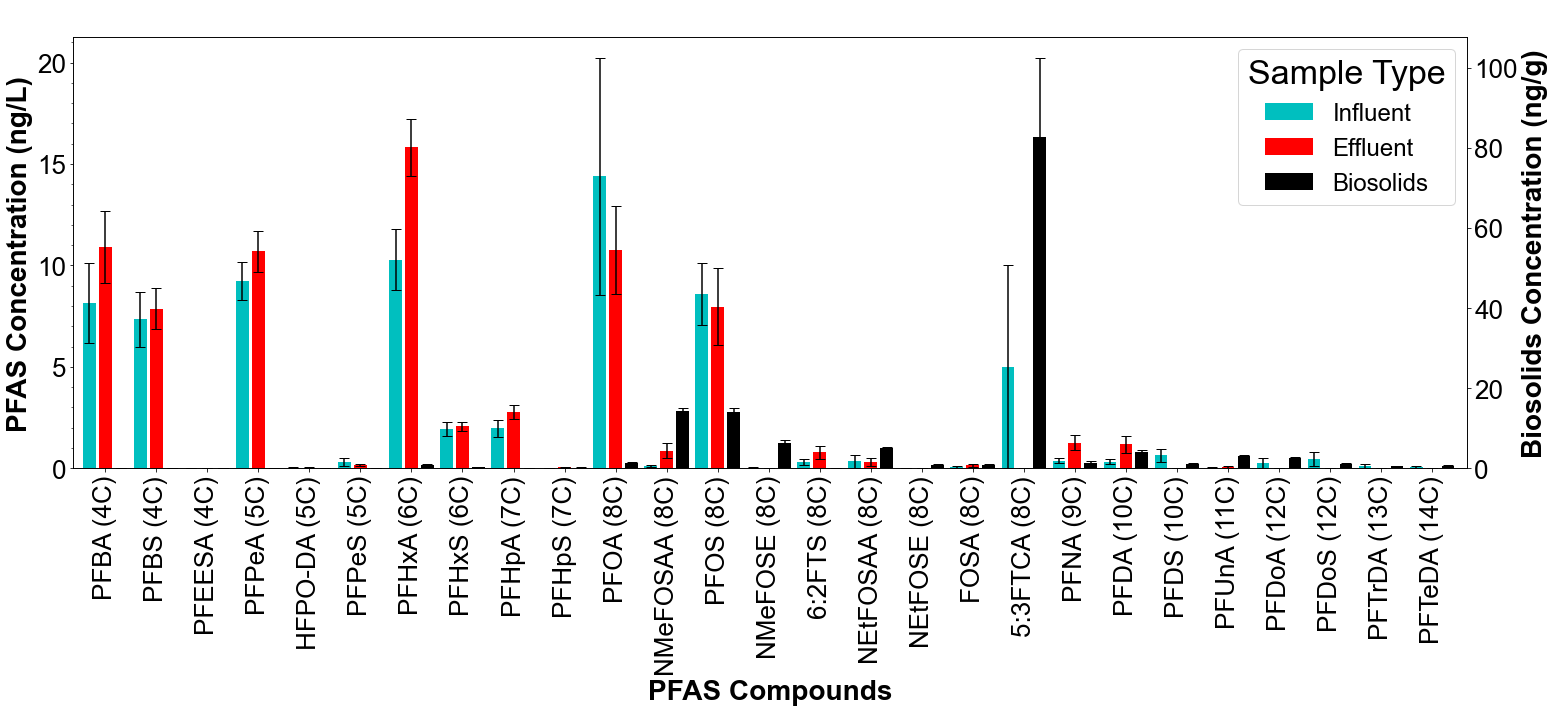

In [362]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Biosolids': 'black',
    'Influent': '#00BFBF',
    'Effluent': 'red'
}
#paper size (20,10) or (4,8) for insert version
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='PFAS Concentration (ng/L)',
                                     secondary_ylabel='Biosolids Concentration (ng/g)', figsize=(22,10),title_fontsize=34, axis_label_fontsize=28, tick_label_fontsize=26, legend_fontsize=24)

### Comparison With National

#### Functions

In [378]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, start_date=None, 
                                      end_date=None,aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [379]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [380]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.15  # Width of each bar within a group
        gap = 0.05  # Gap between each group
        #This gap is only for Biosolids version
        #gap=.05+.15+.05+.15+.05

        # Store the first and last bar positions
        first_bar_position = None
        last_bar_position = None

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            if first_bar_position is None:
                first_bar_position = min(x)
            last_bar_position = max(x)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')

        # Adjust x-axis limits to reduce extra space
        ax.set_xlim(first_bar_position - bar_width, last_bar_position + bar_width)

        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        # Set the legend outside the plot to the right
        #comment out for insert version
        ax.legend( loc='upper center', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### Filters and Settings

In [381]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Forest Grove Effluent','Hillsboro Effluent','Rock Creek Effluent']

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent']


#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluoroheptanoic acid','6:2 Fluorotelomersulfonic acid','NEtFOSAA','Perfluorooctanoic acid (PFOA)','Perfluorooctanesulfonic acid (PFOS)',
                        'Perfluorononanoic acid','Perfluorodecanoic acid']
#filter_pfas_compound=['5:3 FTCA']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-07-15'

#### Create Pivot Table for Avg Concentrations

In [382]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                             start_date=start_date,end_date=end_date,filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
Avg_Pivot=Avg_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
#Avg_Pivot.loc['5:3FTCA']=0
Avg_Pivot=Avg_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})
Avg_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),5.615385,3.920000,4.307143,23.180000
PFBS (4C),4.492308,5.058000,5.472857,13.780000
PFPeA (5C),9.030769,6.680000,5.222857,17.353333
PFHxA (6C),12.630769,13.990000,7.314286,23.780000
PFHxS (6C),1.653846,1.222000,1.681429,3.166000
PFHpA (7C),1.892308,1.406000,1.651429,4.995333
6:2FTS (8C),0.000000,1.271667,0.000000,1.505385
NEtFOSAA (8C),0.130769,0.058000,0.000000,0.811429
PFOA (8C),20.038462,4.430000,4.504286,9.873333


#### Create Pivot Table for Standard Deviation

In [383]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                              filter_pfas_compound=filter_pfas_compound, start_date=start_date,end_date=end_date,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)
# Add a new row for 5:3FTCA with NaN values
std_Pivot.loc['5:3FTCA'] = np.nan
#std_Pivot.loc['5:3FTCA']=0
std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
std_Pivot=std_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

std_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),2.950663,4.223953,3.522597,14.445474
PFBS (4C),1.865682,2.741264,1.153902,9.392033
PFPeA (5C),2.532912,1.622618,2.442606,8.131936
PFHxA (6C),3.076899,6.187164,4.387265,11.860390
PFHxS (6C),0.996339,1.063086,0.880576,1.779060
PFHpA (7C),1.124323,0.804932,1.168695,2.696142
6:2FTS (8C),0.000000,3.651092,0.000000,1.942595
NEtFOSAA (8C),0.471495,0.183412,0.000000,2.629100
PFOA (8C),25.306967,1.932787,2.169208,5.260699


#### Create Pivot Table for Count of Samples

In [384]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                                filter_pfas_compound=filter_pfas_compound,start_date=start_date,end_date=end_date,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)
#count_Pivot.loc['5:3FTCA']=0

count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
count_Pivot=count_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

count_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),13,10,7,15
PFBS (4C),13,10,7,15
PFPeA (5C),13,10,7,15
PFHxA (6C),13,10,7,15
PFHxS (6C),13,10,7,15
PFHpA (7C),13,10,7,15
6:2FTS (8C),11,9,6,13
NEtFOSAA (8C),13,10,7,14
PFOA (8C),13,10,7,15


#### Create Pivot Table for Sampling Error

In [385]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),0.818367,1.335731,1.331417,3.729805
PFBS (4C),0.517447,0.866864,0.436134,2.425013
PFPeA (5C),0.702503,0.513117,0.923218,2.099657
PFHxA (6C),0.853378,1.956553,1.658230,3.062340
PFHxS (6C),0.276335,0.336177,0.332826,0.459351
PFHpA (7C),0.311831,0.254542,0.441725,0.696141
6:2FTS (8C),0.000000,1.217031,0.000000,0.538779
NEtFOSAA (8C),0.130769,0.058000,0.000000,0.702657
PFOA (8C),7.018890,0.611201,0.819883,1.358307


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [386]:
## Add Nationwide data
Avg_Pivot['Nationwide Average']=[11,8,88,50,7,23,23,6,69,83,8,5]  
Avg_Pivot['Nationwide Average of No Industries']=[9,6,38,31,5,9,28,3,51,34,7,5]  

error_Pivot['Nationwide Average']=[1.5,1.49,51.2,15.8,.859,11.2,10.9,2,19.7,39.8,1.57,1.21]  
error_Pivot['Nationwide Average of No Industries']=[1.41,1.24,13.3,4.31,.539,1.84,15.8,.492,10.7, 9,.973,1.38] 

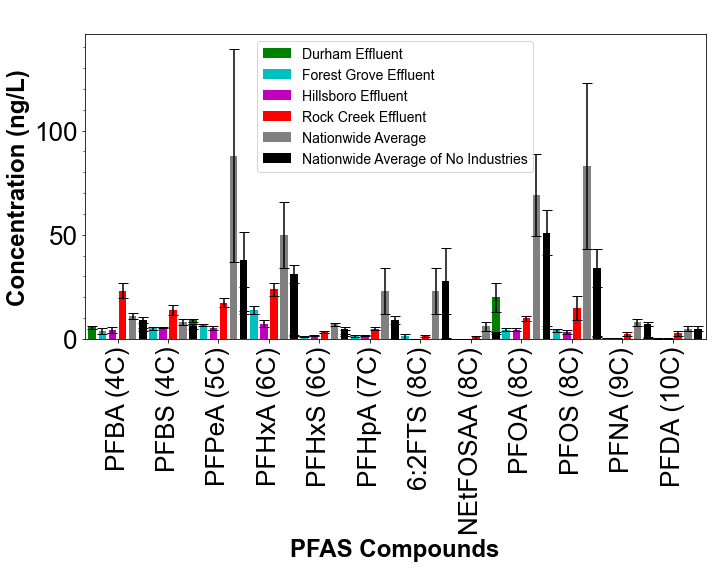

In [387]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Effluent': '#008000',
    'Forest Grove Effluent': '#00BFBF',
    'Rock Creek Effluent': '#FF0000',
    'Hillsboro Effluent' : '#BF00BF',
    'Durham Influent': '#008000',
    'Forest Grove Influent': '#00BFBF',
    'Rock Creek Influent': '#FF0000',
    'Hillsboro Influent' : '#BF00BF',
    'Durham Biosolids': '#008000',
    'Rock Creek Biosolids': '#FF0000',
    'Nationwide Average': 'grey',
    'Nationwide Average of No Industries': 'black'
}
#Main figure is (10,8), insert is (3,5)
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(10,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### Biosolids by Plant

#### Functions

In [425]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [426]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [427]:
from matplotlib.ticker import NullFormatter
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)
        #ax.set_ylim(0, 1000)
        # Set y-axis to log scale
        ax.set_yscale('log')
        # Customize the chart labels and legend
        # Define the ticks you want to use
        ticks = [1, 10, 100, 1000]

        # Set the ticks
        ax.set_yticks(ticks)

        # Set custom tick labels to show the actual numbers
        ax.set_yticklabels([str(tick) for tick in ticks])

        # Optionally, disable minor ticks to reduce clutter
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=0, ha='center')
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.7),fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### Filters and Settings

In [428]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Biosolids','Rock Creek Biosolids']
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)']

#### Create Pivot Table for Avg Concentrations

In [429]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot=Avg_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
Avg_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),12.445455,15.500000
PFOA (8C),1.680909,1.157143


#### Create Pivot Table for Standard Deviation

In [430]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot=std_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})

std_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),3.096244,4.719029
PFOA (8C),2.181057,0.736639


#### Create Pivot Table for Count of Samples

In [431]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot=count_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
count_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),11,14
PFOA (8C),11,14


#### Create Pivot Table for Sampling Error

In [432]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),0.933553,1.261213
PFOA (8C),0.657613,0.196875


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [433]:
## Add Nationwide data
Avg_Pivot['Nationwide Average']=[233,24]  
Avg_Pivot['Nationwide Average of No Industries']=[167,15]  

error_Pivot['Nationwide Average']=[107,7]  
error_Pivot['Nationwide Average of No Industries']=[92,4.3] 

<ipython-input-427-12135503db03>:61: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
C:\Users\rodriguezc\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


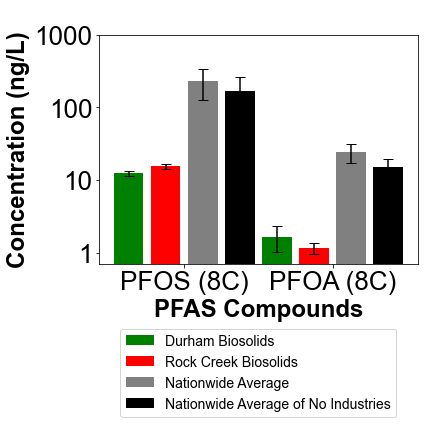

In [434]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Biosolids': '#008000',
    'Rock Creek Biosolids': '#FF0000',
    'Nationwide Average': 'grey',
    'Nationwide Average of No Industries': 'black'
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(6,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### Rivers and Creeks - Seasonal 

#### Prepare Data

In [8]:
filter_Sample_Locations = ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Ash Creek @ Greenburg','Fanno @ SW North Dakota St','Fanno @ SW Bonita Rd','Rock @ NW Old Cornelius Pass Rd',
                           'Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Dawson @ Brookwood','Rock @ River Rd','Fanno @ Durham Park',
                           'Fanno @ SW Grant Ave','Rock @ Brookwood','Beaverton @ Cornelius','Dairy @ Hwy 8','Chicken @ Sholls-Sherwood','Scoggins Below Hagg','Gales @ Stringtown',
                           'McKay @ Padgett','TR @ Cherry Grove','TR @ Golf Course','TR @ Farmington','Fanno at Durham Rd','TR @ Jurgens','TR @ Fernhill','TR @ Boones Ferry',
                           'TR @ Rood Br','Durham Effluent','Rock Creek Effluent']

In [9]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
data_df_Seasonal = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL')]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Define the values you want to filter by
filter_values_wet = ['Urban Creek PFAS Monitoring', 'Ambi PFAS Monitoring']

data_RCEffluent_wet = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Rock Creek Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024')& (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_DurhamEffluent_wet = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Durham Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024')& (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_ForestEffluent_wet= data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Forest Grove Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_HillsboroEffluent_wet = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Hillsboro Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
# Filter the DataFrame
start_date='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-03-30'
data_df_wet = data_df_Seasonal[data_df_Seasonal['Sample Name'].isin(filter_values_wet)  & (data_df_Seasonal['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date)]
data_df_wet=pd.concat([data_df_wet, data_RCEffluent_wet, data_DurhamEffluent_wet,data_ForestEffluent_wet,data_HillsboroEffluent_wet])


data_df_wet=data_df_wet[data_df_wet['Sample Location'].isin(filter_Sample_Locations)& (data_df_wet['Analysis'] == 'PFAS-CL')]

<ipython-input-159-49af8f53eb06>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_RCEffluent_wet = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Rock Creek Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024')& (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
<ipython-input-159-49af8f53eb06>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_DurhamEffluent_wet = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Durham Effluent') & (data_df_Seasonal['Analysis Method'] == 1633) & (data_df_Seasonal['Sample Date'] == '03/12/2024')& (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
<ipython-input-159-49af8f53eb06>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ForestEfflu

In [ ]:
data_df_wet['Sample Date'].unique()

array(['2024-02-19T00:00:00.000000000', '2024-02-20T00:00:00.000000000',
       '2024-02-21T00:00:00.000000000', '2024-03-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
#Dataset for June 2023 Ambient PFAS Sampling
# Define the values you want to filter by
filter_values_dry = ['Ambient PFAS Project #318']
#Get Effluent data
data_RCEffluent_dry_April = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Rock Creek Effluent')  & (data_df_Seasonal['Sample Date'] == '04/06/2023')]
data_DurhamEffluent_dry_April = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Durham Effluent')  & (data_df_Seasonal['Sample Date'] == '04/06/2023')]
data_ForestEffluent_dry_April = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Forest Grove Effluent') & (data_df_Seasonal['Sample Date'] == '04/06/2023')]
data_HillsboroEffluent_dry_April = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Hillsboro Effluent') & (data_df_Seasonal['Sample Date'] == '04/06/2023')]

data_RCEffluent_dry_Sep = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Rock Creek Effluent')  & (data_df_Seasonal['Sample Date'] == '09/11/2023')]
data_DurhamEffluent_dry_Sep = data_df_Seasonal[(data_df_Seasonal['Sample Location'] == 'Durham Effluent')  & (data_df_Seasonal['Sample Date'] == '09/11/2023')]
data_ForestEffluent_dry_Sep = data_df[(data_df['Sample Location'] == 'Forest Grove Effluent') & (data_df['Sample Date'] == '09/11/2023')]
data_HillsboroEffluent_drySep = data_df[(data_df['Sample Location'] == 'Hillsboro Effluent') & (data_df['Sample Date'] == '09/11/2023')]
# Filter the DataFrame
data_df_dry = data_df_Seasonal[data_df_Seasonal['Sample Name'].isin(filter_values_dry)]
data_df_dry=pd.concat([data_df_dry, data_RCEffluent_dry_April, data_DurhamEffluent_dry_April,data_RCEffluent_dry_Sep,data_DurhamEffluent_dry_Sep,data_ForestEffluent_dry_April,
                       data_HillsboroEffluent_dry_April,data_ForestEffluent_dry_Sep,data_HillsboroEffluent_drySep])

data_df_dry=data_df_dry[data_df_dry['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]
data_df_dry['Sample Date'].unique()


<ipython-input-179-3afa4c127151>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df_dry=data_df_dry[data_df_dry['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]


array(['2023-06-06T00:00:00.000000000', '2023-06-07T00:00:00.000000000',
       '2023-04-06T00:00:00.000000000', '2023-09-11T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
data_RCEffluent_Apr2023 = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent')  & (data_df['Sample Date'] == '04/06/2023')]
data_DurhamEffluent_Apr2023 = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Sample Date'] == '04/06/2023')]
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_WetToDry='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_WetToDry='2024-04-30'
data_df_WetToDry = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date_WetToDry) & (data_df['Sample Date'] <= end_date_WetToDry) 
                  & (data_df['Analysis'] == 'PFAS-CL')&(data_df['Sample Name'] != 'Thomas Dairy Tracer Study') ]

data_df_WetToDry=pd.concat([data_df_WetToDry,data_DurhamEffluent_Apr2023, data_RCEffluent_Apr2023])

#### Define Functions

In [57]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [58]:
def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 14th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label  # Return label unmodified if it's short enough or no space found

In [199]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, season_3_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35, rows_order=[]):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Convert zeros to NaNs to avoid plotting zero-height bars
        season_1_data = season_1_data.replace(0, np.nan)
        season_2_data = season_2_data.replace(0, np.nan)
        season_3_data = season_3_data.replace(0, np.nan)
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = set(season_1_data.index).union(season_2_data.index).union(season_3_data.index)
        locations = sorted(locations, key=lambda x: rows_order.index(x) if x in rows_order else len(rows_order))
        
        # Position indices for the bars, adjusted to include gaps and three seasons
        x_indices = np.arange(len(locations))
        gap = 0.02  # This is the gap between bars
        adjusted_width = (bar_width - 2 * gap) / 3  # Adjust bar width to accommodate three bars
        
        season_bottoms = [{loc: 0 for loc in locations} for _ in range(3)]  # Tracking bottoms for each bar stack in three seasons
        legend_entries = {}  # Dictionary to manage legend entries

        # Iterate through each compound defined in the color dictionary
        for compound in compound_colors_dict:
            color = compound_colors_dict[compound]
            for i, season_data in enumerate([season_1_data, season_2_data, season_3_data]):
                heights = [season_data.at[loc, compound] if compound in season_data.columns and pd.notna(season_data.at[loc, compound]) else 0 for loc in locations]
                # Plot bars for each season with adjusted positions
                bars = ax.bar(x_indices + i * (adjusted_width + gap) - bar_width / 2, heights, width=adjusted_width,
                       bottom=[season_bottoms[i][loc] for loc in locations], color=color, align='edge')
                # Update bottom heights for stacking
                season_bottoms[i] = {loc: season_bottoms[i][loc] + height for loc, height in zip(locations, heights)}
                # Manage legend entries
                if compound not in legend_entries and any(heights):
                    legend_entries[compound] = bars[0]  # Use the first bar artist as the legend handle for this compound

        # Calculate the maximum stack height for setting y-axis limits
        max_stack_height = max(max(bottoms.values()) for bottoms in season_bottoms)
        #ax.set_ylim(0, max_stack_height * 1.10 if max_stack_height > 0 else 1)  # Adjusting y-axis
        ax.set_ylim(0, 160)  # Adjusting y-axis
        # Set y-axis ticks every 25 units
        ax.set_yticks(np.arange(0, 160, 20))
        ax.set_xticks(x_indices)
        ax.set_xticklabels([split_label(label) for label in locations], rotation=45, ha='right', fontsize=tick_label_fontsize)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title, fontsize=title_fontsize, fontproperties=font_bold)

        # Set the legend using the managed entries
        #ax.legend(legend_entries.values(), legend_entries.keys(), title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=8, fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


In [60]:
def align_dataframes(df_list):
    """ Ensure all dataframes in the list have the same columns by adding dummy columns with 0s where needed. """
    # Union all columns from all dataframes
    all_columns = sorted(set.union(*(set(df.columns) for df in df_list)))
    
    # Add missing columns with default values of 0
    for df in df_list:
        missing_cols = set(all_columns) - set(df.columns)
        for col in missing_cols:
            df[col] = 0  # Add missing columns with 0s
    
    # Reorder all columns to match the union of all columns
    for i in range(len(df_list)):
        df_list[i] = df_list[i][all_columns]
        
    return df_list

#### Define Seasons

In [253]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_wet='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_wet='2024-03-13'

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_dry='2023-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_dry='2023-09-13'

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_WetToDry='2023-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_WetToDry='2024-04-30'

#### For Ambient Locations (Tualatin River)

In [266]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']

#For 2024 Data

rows_order= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']
rows_order_reverse=['TR @ Boones Ferry','TR @ Jurgens','TR @ Farmington',
                    'TR @ Rood Br','TR @ Golf Course','TR @ Fernhill',
                   'TR @ Cherry Grove' ]

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [267]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0.47,0,0,0,0
TR @ Fernhill,0.0,0.00,0.22,0.00,0.34,0.00,0.00,0,0,0,...,0,0,0,0,0,0.39,0,0,0,0
TR @ Golf Course,0.0,0.00,0.23,0.00,0.35,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Rood Br,0.0,0.41,0.36,0.00,0.58,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Farmington,4.5,2.60,2.80,1.10,1.70,0.26,0.34,0,0,0,...,0,0,0,0,0,0.51,0,0,0,0
TR @ Jurgens,4.9,3.30,3.00,0.98,2.00,0.35,0.37,0,0,0,...,0,0,0,0,0,0.49,0,0,0,0
TR @ Boones Ferry,4.7,3.40,3.50,1.20,2.40,0.30,0.37,0,0,0,...,0,0,0,0,0,0.32,0,0,0,0


In [268]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0,0.0,0.0,0.00,0.98,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,0,0.0,1.1,0.50,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Jurgens,0,0,0,0,0.0,1.5,0.54,1.30,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Boones Ferry,0,0,0,0,1.4,1.6,0.63,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0.0,0.0,0.0,0.00,0.91,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,2.3,1.9,2.0,0.56,1.50,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Jurgens,0,0,0,2.0,1.7,1.8,0.66,1.70,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Boones Ferry,0,0,0,2.3,2.1,2.0,0.69,1.80,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet = aligned_dataframes

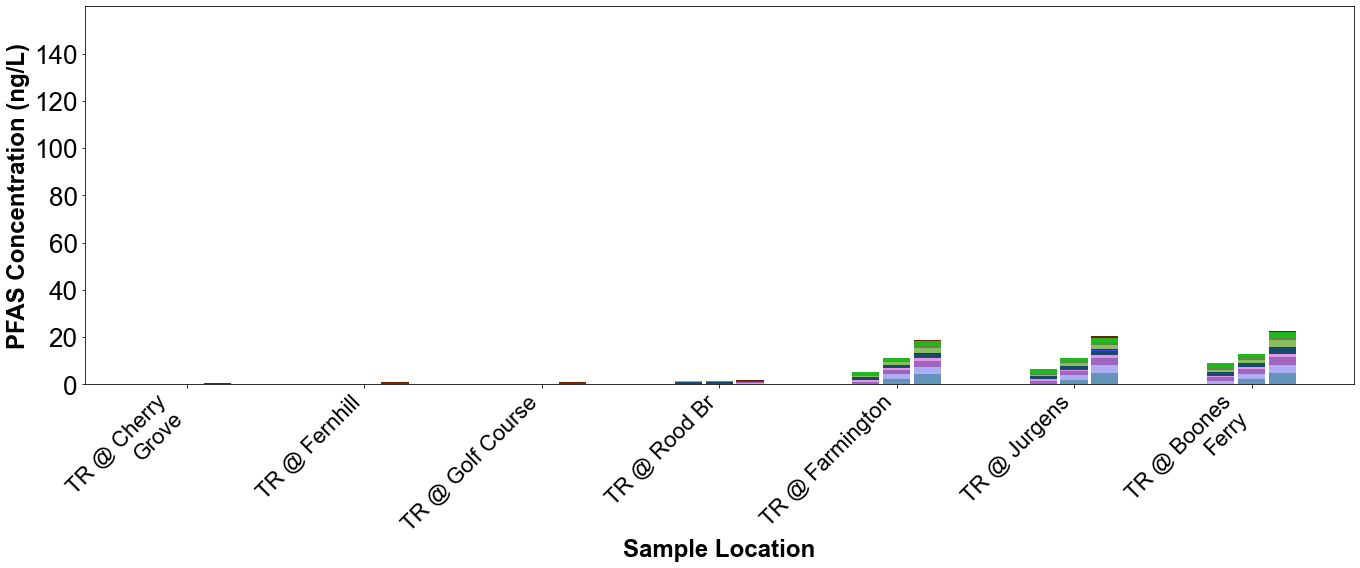

In [271]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet,season_2_data=avg_pivot_table_WetToDry, season_3_data=avg_pivot_table_dry,figsize=(19,8), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20, bar_width=0.5,
                                   title='',rows_order=rows_order)

### Upper Tributaries

In [261]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Scoggins Below Hagg','Gales @ Stringtown','Dairy @ Hwy 8','McKay @ Padgett']

rows_order= ['Scoggins Below Hagg','Gales @ Stringtown','Dairy @ Hwy 8','McKay @ Padgett',]
rows_order_reverse=['McKay @ Padgett','Dairy @ Hwy 8','Gales @ Stringtown','Scoggins Below Hagg']


col_name= 'Quant Incl Estimates Incl Qual Flags'

In [262]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
avg_pivot_table_dry.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0.00,0,0,0,0
Gales @ Stringtown,0.0,0.00,0.00,0.00,0.34,0.00,0.00,0,0,0,...,0,0,0,0,0,0.36,0,0,0,0
Dairy @ Hwy 8,0.0,0.68,0.59,0.29,0.88,0.00,0.00,0,0,0,...,0,0,0,0,0,0.31,0,0,0,0
McKay @ Padgett,2.1,2.00,1.80,1.00,2.10,0.38,0.39,0,0,0,...,0,0,0,0,0,0.35,0,0,0,0


In [263]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
avg_pivot_table_wet.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.1,1.3,1.8,1.1,2.8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.00,0.69,0,0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.2,1.9,1.7,0.88,2.70,0,0,...,0,0,0,0,0,0,0,0,0,0


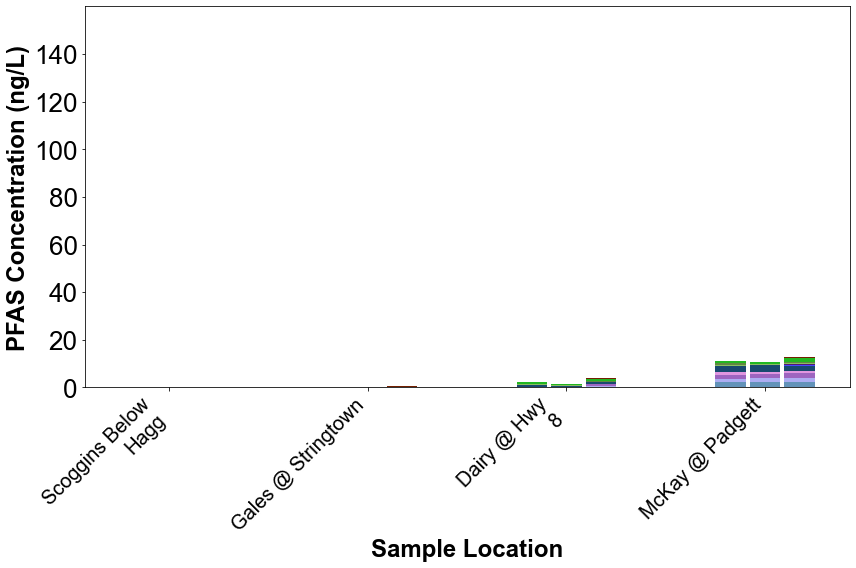

In [265]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet, season_2_data=avg_pivot_table_WetToDry,season_3_data=avg_pivot_table_dry,figsize=(12,8), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='',rows_order=rows_order)


### Lower Tributaries

In [254]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']

rows_order= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']
rows_order_reverse=['Fanno @ Durham Rd','Durham Effluent','Chicken @ Sholls-Sherwood','Rock @ Brookwood', 'Rock Creek Effluent']


col_name= 'Quant Incl Estimates Incl Qual Flags'

In [255]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)

#avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,10.0,9.80,13.0,1.80,11.9,8.50,10.000,0.9,0,0,...,0.83,0.47,0,0,0,1.20,0,0.00,0,0
Rock @ Brookwood,4.4,5.90,5.0,2.10,5.0,0.94,0.960,0.0,0,0,...,0.00,0.00,0,0,0,0.37,0,0.00,0,0
Chicken @ Sholls- Sherwood,0.0,1.50,1.2,0.47,1.2,0.00,0.000,0.0,0,0,...,0.00,0.00,0,0,0,0.32,0,0.37,0,0
Durham Effluent,3.0,8.85,9.4,1.00,6.4,0.45,0.365,0.0,0,0,...,0.00,0.00,0,0,0,0.00,0,0.00,0,0
Fanno at Durham Rd,4.1,6.20,5.9,2.90,7.3,1.10,1.300,0.0,0,0,...,0.00,0.00,0,0,0,0.38,0,0.00,0,0


In [256]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)

#avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,24.0,19.0,21.0,6.10,11.0,1.5,0.76,...,0,0,0,0,0,0,0,0,0,0
Rock @ Brookwood,0,0,0,3.6,4.1,4.1,2.00,4.9,1.1,0.56,...,0,0,0,0,0,0,0,0,0,0
Chicken @ Sholls- Sherwood,0,0,0,0.0,1.4,1.3,0.76,1.6,1.1,0.00,...,0,0,0,0,0,0,0,0,0,0
Durham Effluent,0,0,0,10.0,8.8,9.4,2.80,7.4,1.0,0.59,...,0,0,0,0,0,0,0,0,0,0
Fanno at Durham Rd,0,0,0,3.5,5.8,5.3,2.60,0.0,1.0,0.76,...,0,0,0,0,0,0,0,0,0,0


In [257]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
avg_pivot_table_WetToDry.index = avg_pivot_table_WetToDry.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,0.0,7.6,10.0,0.00,5.8,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ Brookwood,0,0,0,4.2,4.6,4.2,1.90,4.9,0.97,0.49,...,0,0,0,0,0,0,0,0,0,0
Chicken @ Sholls- Sherwood,0,0,0,0.0,0.0,1.4,0.69,1.5,1.20,0.00,...,0,0,0,0,0,0,0,0,0,0
Durham Effluent,0,0,0,0.0,6.7,9.9,0.00,7.8,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
Fanno at Durham Rd,0,0,0,3.6,5.5,5.1,2.30,7.4,0.99,0.98,...,0,0,0,0,0,0,0,0,0,0


In [258]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet = aligned_dataframes

In [259]:
#Re-define rows order since 'Chicken @ Sholls-Sherwood' changed to 'Chicken @ Sholls- Sherwood'
rows_order=['Rock Creek Effluent',
 'Rock @ Brookwood',
 'Chicken @ Sholls- Sherwood',
 'Durham Effluent',
 'Fanno at Durham Rd']

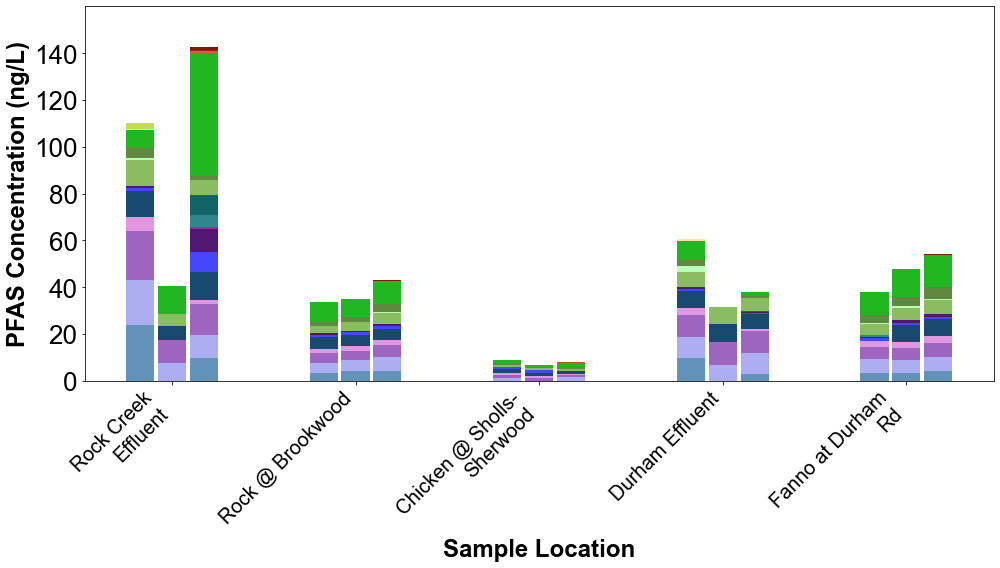

In [260]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet, season_2_data=avg_pivot_table_WetToDry,season_3_data=avg_pivot_table_dry,figsize=(14,8), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='',rows_order=rows_order)

### Urban Creeks

#### Functions

In [18]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [19]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [20]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None, col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) > 0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [21]:
def calculate_error_pivot( std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [35]:
def create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title='Average PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12,ylim=50):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Filter out locations with all zeros in avg_pivot_table
        avg_pivot_table_filtered = avg_pivot_table.loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        # Filter std_dev_pivot_table to match avg_pivot_table_filtered columns if not empty
        if std_dev_pivot_table is not None and not std_dev_pivot_table.empty:
            std_dev_pivot_table_filtered = std_dev_pivot_table[avg_pivot_table_filtered.columns]
        else:
            std_dev_pivot_table_filtered = pd.DataFrame(columns=avg_pivot_table_filtered.columns, index=avg_pivot_table_filtered.index)
        
        fig, ax = plt.subplots(figsize=figsize)
        bottom = np.zeros(len(avg_pivot_table_filtered.index))

        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound)
            
            bars = ax.bar(avg_pivot_table_filtered.index, avg_values, width=0.35, bottom=bottom, color=color, label=compound, yerr=std_dev_values,capsize=5)
            bottom += avg_values
        ax.set_ylim(0, 60)
        ax.set_xlabel('Sample Location',fontsize=axis_label_fontsize,fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)',fontsize=axis_label_fontsize,fontproperties=font_bold)
        ax.set_title(title,fontsize=title_fontsize,fontproperties=font_bold)

        # Modify the x-tick labels
        def split_label(label):
            if len(label) > 9:
                split_point = label.find(' ', 9)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        xtick_labels = [split_label(label) for label in avg_pivot_table_filtered.index]
        ax.set_xticklabels(xtick_labels, rotation=45, ha='right',fontsize=tick_label_fontsize,fontproperties=font)

        # Generate legend only for compounds actually plotted
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        # Reverse the order of handles and labels
        legend_handles.reverse()
        legend_labels.reverse()
        ax.legend(handles=legend_handles, labels=legend_labels, title='PFAS Compounds', bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=legend_fontsize,title_fontsize=legend_fontsize+2, ncol=1)

        #plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

#### Rock Creek

In [23]:
# For Rock Creek
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=data_df['PFAS Compound'].unique()
#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock @ River Rd', 'Rock @ East Main St',
       'Rock @ NE Cornelius Pass Rd', 'Rock @ NW Rock Creek Blvd',
       'Rock @ NW Old Cornelius Pass Rd','Rock @ Brookwood','Beaverton @ Cornelius','Dawson @ Brookwood']

rows_order= ['Rock @ NW Old Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Beaverton @ Cornelius','Dawson @ Brookwood','Rock @ Brookwood','Rock @ River Rd']
rows_order_reverse=[ 'Rock @ River Rd','Rock @ Brookwood','Dawson @ Brookwood','Beaverton @ Cornelius','Rock @ East Main St','Rock @ NE Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NW Old Cornelius Pass Rd'
                    ]
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-7-17'

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [24]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date,
                                                                                   col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace( 'NW', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' NE', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' Old', '')


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock @ NW Old Cornelius Pass Rd,0,0,0,0.00,0.0,0.00,0.00,0.00,0.000,0.00,...,0,0,0,0,0.0,0,0,0,0,0
Rock @ NW Rock Creek Blvd,0,0,0,1.20,1.5,1.55,1.35,3.95,0.475,0.00,...,0,0,0,0,0.0,0,0,0,0,0
Rock @ NE Cornelius Pass Rd,0,0,0,2.65,2.4,2.25,1.65,4.15,0.590,0.00,...,0,0,0,0,0.0,0,0,0,0,0
Rock @ East Main St,0,0,0,2.80,1.5,2.30,1.80,4.65,0.790,0.00,...,0,0,0,0,0.0,0,0,0,0,0
Beaverton @ Cornelius,0,0,0,5.20,6.0,6.00,2.80,7.60,1.400,0.73,...,0,0,0,0,0.0,0,0,0,0,0


In [25]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date,
                                                                                   col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in count_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
count_pivot_table = count_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
count_pivot_table = count_pivot_table[filtered_order]

count_pivot_table = count_pivot_table.rename(columns=pfas_mapping)
#avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace( 'NW', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' NE', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' Old', '')


count_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock @ NW Old Cornelius Pass Rd,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Rock @ NW Rock Creek Blvd,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Rock @ NE Cornelius Pass Rd,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Rock @ East Main St,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Beaverton @ Cornelius,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [26]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

stdev_pivot_table = create_std_dev_pivot_table_with_filters(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date,
                                                                                   col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in stdev_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
#stdev_pivot_table = stdev_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
stdev_pivot_table = stdev_pivot_table[filtered_order]

stdev_pivot_table = stdev_pivot_table.rename(columns=pfas_mapping)
#avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace( 'NW', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' NE', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' Old', '')


stdev_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock @ Brookwood,0.0,0.0,0.0,0.416333,0.929157,0.493288,0.100000,0.057735,0.085049,0.253574,...,0.0,0.0,0.0,0.0,0.21362,0.0,0.0,0.0,0.0,0.0
Rock @ East Main St,0.0,0.0,0.0,0.282843,2.121320,0.000000,0.141421,0.494975,0.042426,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Rock @ NE Cornelius Pass Rd,0.0,0.0,0.0,0.070711,0.141421,0.353553,0.353553,0.353553,0.042426,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Rock @ NW Old Cornelius Pass Rd,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Rock @ NW Rock Creek Blvd,0.0,0.0,0.0,1.697056,0.282843,0.070711,0.070711,0.919239,0.035355,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [34]:
stderror_pivot=calculate_error_pivot( std_dev_pivot=stdev_pivot_table, count_pivot=count_pivot_table)
# Reordering the stderror_pivot to match the index order of avg_pivot_table
stderror_pivot = stderror_pivot.reindex(avg_pivot_table.index)
stderror_pivot

PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFNS,PFOA,PFODA,PFOS,PFPeA,PFPeS,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock @ NW Old Cornelius Pass Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,NaN,0.00000,0.000000,0.000000,0.0,0.0,0.0
Rock @ NW Rock Creek Blvd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025000,0.0,0.650000,NaN,0.20000,0.200000,0.000000,0.0,0.0,0.0
Rock @ NE Cornelius Pass Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030000,0.0,0.250000,NaN,0.15000,0.100000,0.000000,0.0,0.0,0.0
Rock @ East Main St,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030000,0.0,0.350000,NaN,0.35000,1.500000,0.000000,0.0,0.0,0.0
Beaverton @ Cornelius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dawson @ Brookwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock @ Brookwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049103,0.0,0.033333,NaN,0.64291,0.536449,0.126667,0.0,0.0,0.0
Rock @ River Rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

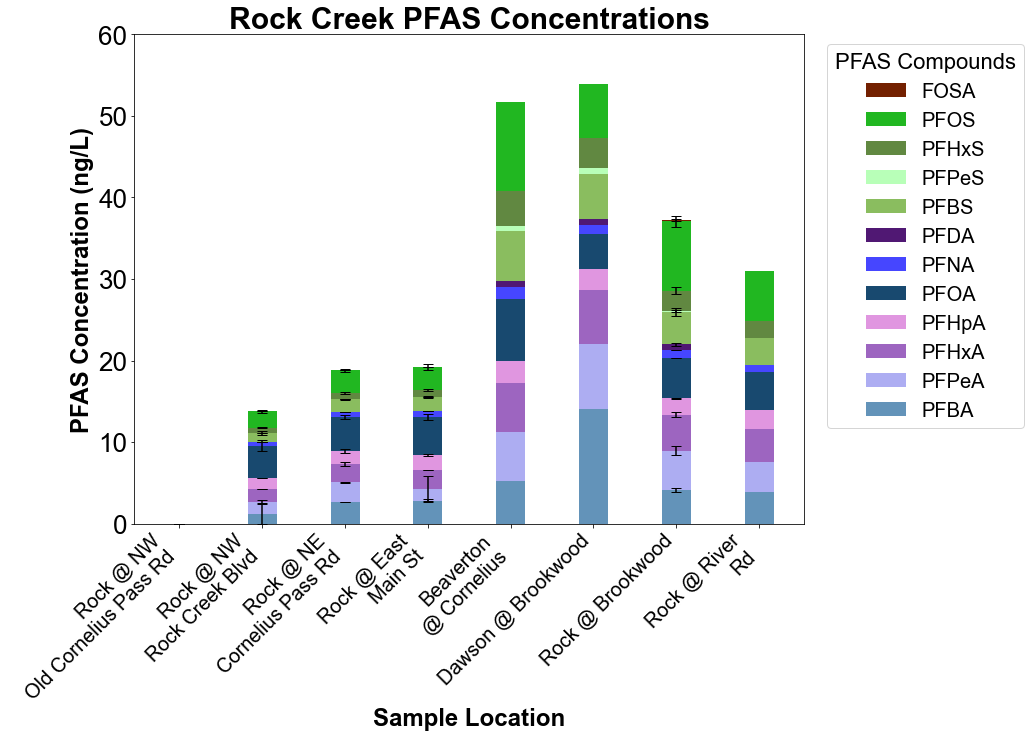

In [36]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=stderror_pivot, figsize=(12, 9),title='Rock Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)


### Fanno Creek

In [37]:
# For Urban Creeks
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=data_df['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Fanno @ Durham Park','Fanno @ Bohmann',
       'Fanno @ SW Bonita Rd', 'Fanno @ SW Grant Ave',
       'Fanno @ SW North Dakota St', 'Fanno @ SW 56th Ave','Fanno at Durham Rd','Ash Creek @ Greenburg']

rows_order= ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Ash Creek @ Greenburg','Fanno @ SW North Dakota St','Fanno @ SW Grant Ave','Fanno @ SW Bonita Rd','Fanno at Durham Rd','Fanno @ Durham Park']
rows_order_reverse=['Fanno @ Durham Park','Fanno @ Durham Rd','Fanno @ SW Bonita Rd','Fanno @ SW Grant Ave','Fanno @ SW North Dakota St','Ash Creek @ Greenburg','Fanno @ Bohmann','Fanno @ SW 56th Ave'
                    ]
                    
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-07-15'

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [38]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
avg_pivot_table.index = avg_pivot_table.index.str.replace('Fanno at', 'Fanno @')


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ SW 56th Ave,0,0,0,2.30,2.5,2.65,1.125,2.585,0.67,0.000,...,0,0,0,0,0.0,0,0,0,0,0
Fanno @ Bohmann,0,0,0,2.70,4.4,4.30,1.900,6.300,0.87,0.590,...,0,0,0,0,0.0,0,0,0,0,0
Ash Creek @ Greenburg,0,0,0,3.70,5.0,3.70,1.700,6.700,0.79,0.690,...,0,0,0,0,0.0,0,0,0,0,0
Fanno @ SW North Dakota St,0,0,0,3.75,5.0,5.40,1.950,6.950,1.10,0.755,...,0,0,0,0,0.0,0,0,0,0,0
Fanno @ SW Grant Ave,0,0,0,3.40,3.7,5.00,2.000,6.700,0.76,0.770,...,0,0,0,0,0.0,0,0,0,0,0


In [39]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in count_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
count_pivot_table = count_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
count_pivot_table = count_pivot_table[filtered_order]

count_pivot_table = count_pivot_table.rename(columns=pfas_mapping)
count_pivot_table.index = count_pivot_table.index.str.replace('Fanno at', 'Fanno @')


count_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ SW 56th Ave,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Fanno @ Bohmann,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Ash Creek @ Greenburg,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Fanno @ SW North Dakota St,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
Fanno @ SW Grant Ave,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [40]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

stdev_pivot_table = create_std_dev_pivot_table_with_filters(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in stdev_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
#stdev_pivot_table = stdev_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
stdev_pivot_table = stdev_pivot_table[filtered_order]

stdev_pivot_table = stdev_pivot_table.rename(columns=pfas_mapping)
stdev_pivot_table.index = stdev_pivot_table.index.str.replace('Fanno at', 'Fanno @')


stdev_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ SW 56th Ave,0.0,0.0,0.0,0.282843,0.282843,0.353553,0.247487,2.425376,0.113137,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Fanno @ SW Bonita Rd,0.0,0.0,0.0,0.070711,0.777817,0.353553,0.070711,0.212132,0.084853,0.007071,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Fanno @ SW North Dakota St,0.0,0.0,0.0,0.070711,0.141421,0.565685,0.212132,0.636396,0.000000,0.261630,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Fanno @ Durham Rd,0.0,0.0,0.0,0.320156,0.465475,0.500000,0.264575,3.737200,0.060759,0.303095,...,0.0,0.0,0.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0


In [41]:
stderror_pivot=calculate_error_pivot( std_dev_pivot=stdev_pivot_table, count_pivot=count_pivot_table)
stderror_pivot = stderror_pivot.reindex(avg_pivot_table.index)
stderror_pivot

PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFNS,PFOA,PFODA,PFOS,PFPeA,PFPeS,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ SW 56th Ave,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08000,0.0,1.7150,NaN,0.600000,0.200000,0.070000,0.0,0.0,0.0
Fanno @ Bohmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash Creek @ Greenburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fanno @ SW North Dakota St,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.4500,NaN,2.450000,0.100000,0.020000,0.0,0.0,0.0
Fanno @ SW Grant Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fanno @ SW Bonita Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06000,0.0,0.1500,NaN,0.500000,0.550000,0.045000,0.0,0.0,0.0
Fanno @ Durham Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03038,0.0,1.8686,NaN,0.970717,0.232737,0.004787,0.0,0.0,0.0
Fanno @ Durham Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

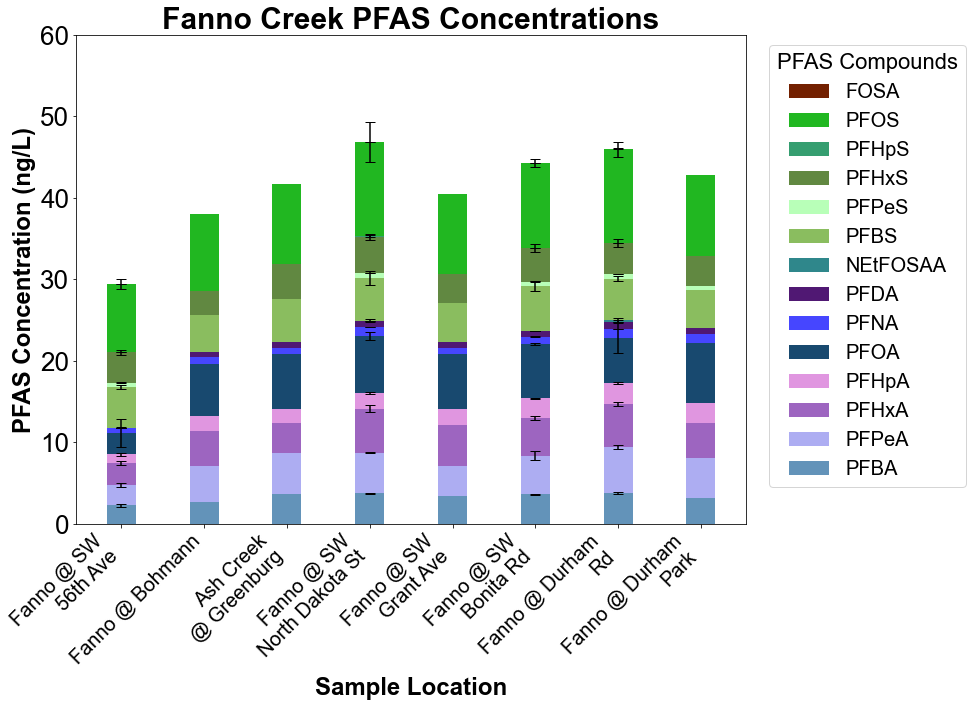

In [42]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=stderror_pivot, figsize=(12, 9),title='Fanno Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

### PFAS Concentrations Relationship to Urban and Ag

#### Functions

In [55]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='Quant Incl Estimates Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [56]:
def plot_correlation_heatmap(data_df, fig_size=(12,12)):
    """
    Plot a heatmap of the Pearson correlation coefficients of a DataFrame.

    Args:
        data_df (pd.DataFrame): The input dataframe with numerical attributes.
        fig_size (tuple): The size of the figure (width, height).
    """
    # Calculate the Pearson correlation coefficients
    correlation_matrix = data_df.corr()

    # Create the heatmap
    plt.figure(figsize=fig_size)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

    # Add titles and labels as needed
    plt.title('Pearson Correlation Heatmap')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')

    # Show the plot
    plt.show()

In [57]:
def plot_scatter(data_df, column_x, column_y, fig_size=(10, 8), 
                 title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14):
    """
    Create a scatter plot for two specified columns from a DataFrame with enhanced styling and
    statistical annotations.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        column_x (str): The name of the column for the x-axis.
        column_y (str): The name of the column for the y-axis.
        fig_size (tuple): The size of the figure (width, height).
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    
    fig, ax = plt.subplots(figsize=fig_size)
    scatter = ax.scatter(data_df[column_x]*100, data_df[column_y])

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_df[column_x]*100, data_df[column_y])
    r_squared = r_value**2

    # Adding linear regression line to the scatter plot
    ax.plot(data_df[column_x]*100, intercept + slope * data_df[column_x]*100, color='red')

    # Adding titles and labels with custom fonts
    ax.set_title(f'Scatter Plot of {column_x} vs {column_y}', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xlabel(column_x, fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(column_y, fontsize=axis_label_fontsize, fontproperties=font_bold)

    # Annotation for R-squared and p-value
    ax.annotate(f'R² = {r_squared:.3f}\np-value = {p_value:.3g}', xy=(0.05, 0.95), xycoords='axes fraction',
                verticalalignment='top', horizontalalignment='left', 
                fontsize=22, bbox=dict(boxstyle="round, pad=0.3", edgecolor='red', facecolor='yellow', alpha=0.5))


    # Setting tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

    plt.tight_layout()
    plt.show()

#### 19.2) Filters and Settings

In [58]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','','Probably ok','probably ok']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-06-30'

start_date='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-02-29'

start_date='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient']

ambient_locations= ['TR @ Jurgens', 'TR @ Cherry Grove', 'TR @ Fernhill',
       'TR @ Boones Ferry', 'TR @ Golf Course', 'TR @ Farmington',
       'Fanno at Durham Rd', 'TR @ Rood Br', 'Rock @ Brookwood',
       'Dairy @ Hwy 8', 'Chicken @ Sholls-Sherwood',
       'Scoggins Below Hagg', 'Gales @ Stringtown', 'McKay @ Padgett',
       'Beaverton @ Cornelius']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=data_df['PFAS Compound'].unique()
#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter =ambient_locations

#### Average Pivot

In [59]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-06-30'
pivot_table_2023=create_filtered_pivot_table(data_df=data_df, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table_2023.index = pivot_table_2023.index.map(pfas_mapping)

pivot_table_2023=pivot_table_2023.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table_2023['PFAS Total'] = pivot_table_2023.sum(axis=1)

#pivot_table_2023.index = pivot_table_2023.index.map(lambda x: str(x) + '_2023')
pivot_table_2023


PFAS Compound,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.32,1.60,1.20,0.00,1.50,0.0,0.0,0.0,8.21
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.31,0.99,0.88,0.00,0.68,0.0,0.0,0.0,3.98
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.38,14.00,7.30,0.58,6.20,0.0,0.0,0.0,54.36
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.36,0.00,0.34,0.00,0.00,0.0,0.0,0.0,0.70
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.35,1.50,2.10,0.00,2.00,0.0,0.0,0.0,12.62
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.37,9.70,5.00,0.38,5.90,0.0,0.0,0.0,42.95
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.32,2.70,2.40,0.00,3.40,0.0,0.0,0.0,22.59
TR @ Cherry Grove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.47,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.72


In [60]:
start_date='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-02-29'
pivot_table_Feb2024=create_filtered_pivot_table(data_df=data_df, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table_Feb2024.index = pivot_table_Feb2024.index.map(pfas_mapping)

pivot_table_Feb2024=pivot_table_Feb2024.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table_Feb2024['PFAS Total'] = pivot_table_Feb2024.sum(axis=1)

#pivot_table_2024.index = pivot_table_2024.index.map(lambda x: str(x) + '_2024')
pivot_table_Feb2024

PFAS Compound,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,...,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,0.0,1.60,1.60,0.00,1.4,0.0,0.0,0.0,9.07
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.88,1.00,0.00,0.0,0.0,0.0,0.0,2.17
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.90,0.00,0.56,5.8,0.0,0.0,0.0,37.93
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.10,2.80,0.00,1.3,0.0,0.0,0.0,11.20
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,0.0,8.30,4.90,0.00,4.1,0.0,0.0,0.0,33.66
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.10,1.40,0.00,1.4,0.0,0.0,0.0,8.86
TR @ Cherry Grove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00


In [62]:
start_date='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
pivot_table_Apr2024=create_filtered_pivot_table(data_df=data_df, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table_Apr2024.index = pivot_table_Apr2024.index.map(pfas_mapping)

pivot_table_Apr2024=pivot_table_Apr2024.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table_Apr2024['PFAS Total'] = pivot_table_Apr2024.sum(axis=1)

#pivot_table_2024.index = pivot_table_2024.index.map(lambda x: str(x) + '_2024')
pivot_table_Apr2024

PFAS Compound,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,...,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Beaverton @ Cornelius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.40,0.0,11.00,7.60,0.73,6.0,0.0,0.0,0.0,51.76
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.20,0.0,1.20,1.50,0.00,0.0,0.0,0.0,0.0,6.90
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.58,0.69,0.00,0.0,0.0,0.0,0.0,1.58
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,0.0,12.00,7.40,0.58,5.5,0.0,0.0,0.0,47.85
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.88,2.70,0.00,1.9,0.0,0.0,0.0,10.87
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.97,0.0,7.50,4.90,0.00,4.6,0.0,0.0,0.0,34.96
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,1.80,1.80,0.00,2.1,0.0,0.0,0.0,12.74


In [63]:
# Concatenate the DataFrames
pivot_table = pd.concat([pivot_table_2023, pivot_table_Feb2024,pivot_table_Apr2024], ignore_index=False)
pivot_table

PFAS Compound,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFTrDA,PFUnA,PFAS Total,3:3FTCA,5:3FTCA,7:3FTCA,NFDHA,PFEESA,PFMBA,PFMPA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,8.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,3.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,54.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,12.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,42.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,22.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR @ Cherry Grove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.4) Import Sample Sites Data

In [64]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'June 2023 Ambient Flows'

#Call data import function
sites_df = read_excel_sheet(excel_file_path, sheet_name)

#drop multiple columns by name
sites_df.drop(['Unnamed: 0', 'June 2023 Flow (cfs)','Source Notes'], axis=1, inplace=True)

# setting 	WRRF Effluents for Ambient as index column
sites_df.set_index("WRRF Effluents for Ambient", inplace = True)
sites_df.head()

,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
WRRF Effluents for Ambient,,,,,,,,,,,
TR @ Cherry Grove,25461.924347,21549.382949,3661.284345,251.257053,477.086571,0.846338,0.143794,0.009868,0.018737,NaN,NaN
Scoggins Below Hagg,4951.660999,3194.021900,1547.320000,210.319099,211.557982,0.645041,0.312485,0.042474,0.042725,NaN,NaN
Gales @ Stringtown,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
TR @ Fernhill,136872.565188,98254.411496,34653.435124,3964.718568,3537.833545,0.717853,0.253180,0.028966,0.025848,NaN,Scoggins + Gales
Forest Grove Effluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.5) Merge PFAS Compound Concentrations and Sample Locations Information based on Sample Locations

In [65]:
# Merge dataframes
merged_df = pd.merge(pivot_table, sites_df, left_index=True, right_index=True, how='inner')
merged_df

,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Fanno at Durham Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Fanno at Durham Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN


#### 19.7 Create Scatter Plot to See Relationship

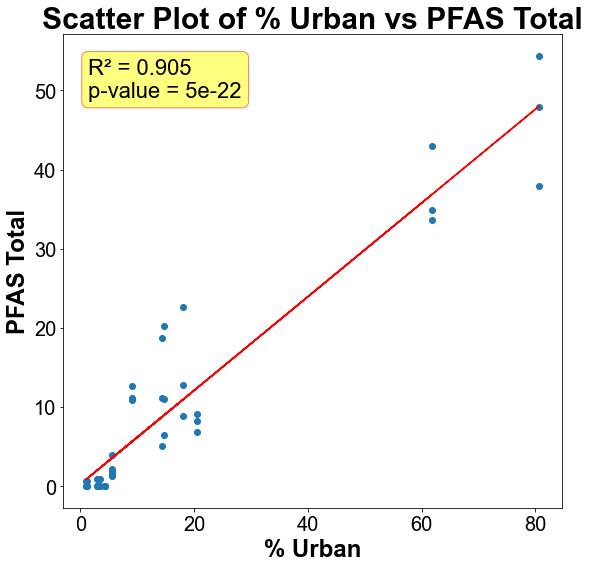

In [66]:
plot_scatter(merged_df,  '% Urban','PFAS Total',fig_size=(8,8),title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20)

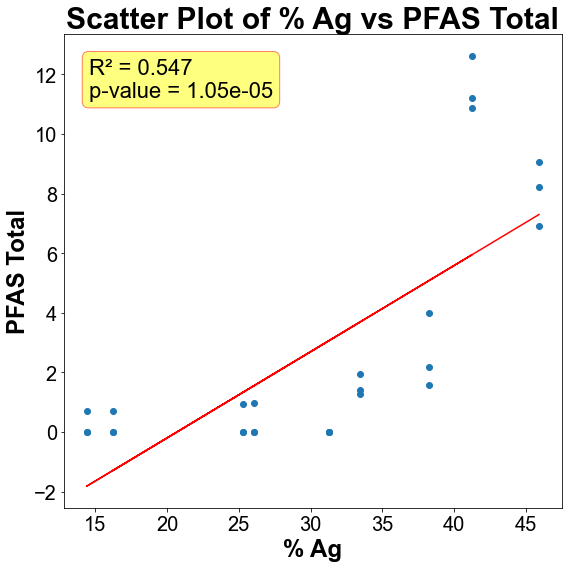

In [67]:
plot_scatter(merged_df.loc[['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Gales @ Stringtown', 'McKay @ Padgett','Scoggins Below Hagg', 'TR @ Cherry Grove',
               'TR @ Fernhill', 'TR @ Golf Course','TR @ Rood Br']],  '% Ag','PFAS Total',fig_size=(8,8),title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20)

In [68]:
merged_df.loc[['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Gales @ Stringtown', 'McKay @ Padgett','Scoggins Below Hagg', 'TR @ Cherry Grove',
               'TR @ Fernhill', 'TR @ Golf Course','TR @ Rood Br']]

,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
Gales @ Stringtown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
Gales @ Stringtown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19516.486731,16212.526740,3585.069093,2339.552083,0.496425,0.412385,0.091190,0.059509,NaN,NaN


### Thomas Dairy Soil and Groundwater Data

#### Functions

In [240]:
def create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter):
    """
    Create three pivot tables for the average, standard deviation, and count of 'Quant Only Incl Qual Flags',
    filtered by specified criteria.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        sample_location_filter (list): Filter values for 'Sample Location'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.

    Returns:
        tuple: A tuple containing three pd.DataFrames (average, standard deviation, count pivot tables).
    """
    # Convert 'Sample Date' to datetime and apply filters
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    filtered_data = data_df[
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Sample Location'].isin(sample_location_filter)) &
        (data_df['PFAS Compound'].isin(pfas_compound_filter))
    ]
    
    # Create pivot tables
    avg_pivot = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='mean')
    std_pivot = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='std')
    count_pivot = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='count')
    
    return avg_pivot, std_pivot, count_pivot

In [241]:
def create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping):
    """
    Create a summary dataframe with averages, standard errors, and categories.

    Args:
        avg_pivot (pd.DataFrame): Pivot table with average values.
        std_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.
        category_mapping (pd.DataFrame): Dataframe with 'Sample Location', 'Category' and 'Sub-Category' mappings.

    Returns:
        pd.DataFrame: Dataframe with averages, standard errors, 'Category', and 'Sub-Category'.
    """
    # Create the standard error DataFrame
    standard_error = std_pivot / np.sqrt(count_pivot)
    
    # Concatenate the average, standard deviation, and standard error DataFrames
    summary_df = pd.concat([avg_pivot, std_pivot, standard_error], axis=1, keys=['Average', 'StdDev', 'StdError'])
    
    # Reset the index to turn it into a column for merging
    summary_df.reset_index(inplace=True)
    
    # Merge the summary with the category mapping
    summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')
    
    # Set the index back to 'Sample Location'
    summary_with_categories.set_index('Sample Location', inplace=True)
    
    return summary_with_categories


In [242]:
# Define the data for category mapping
category_data = {
    'Sample Location': [
        'Thomas Dairy Control Site Well', 'Thomas Dairy Control Site Soil - 0', 
        'Thomas Dairy Control Site Soil - 1', 'Thomas Dairy Control Site Soil - 2', 
        'Thomas Dairy Site 1 Well', 'Thomas Dairy Site 1 Soil - 0', 
        'Thomas Dairy Site 1 Soil - 1', 'Thomas Dairy Site 1 Soil - 2', 
        'Thomas Dairy Site 2 Well', 'Thomas Dairy Site 2 Soil - 0', 
        'Thomas Dairy Site 2 Soil - 1', 'Thomas Dairy Site 2 Soil - 2', 
        'Thomas Dairy Site 3 Well', 'Thomas Dairy Site 3 Soil - 0', 
        'Thomas Dairy Site 3 Soil - 1', 'Thomas Dairy Site 3 Soil - 2'
    ],
    'Category': [
        'Control', 'Control', 'Control', 'Control', 
        'Site 1', 'Site 1', 'Site 1', 'Site 1', 
        'Site 2', 'Site 2', 'Site 2', 'Site 2', 
        'Site 3', 'Site 3', 'Site 3', 'Site 3'
    ],
    'Sub-Category': [
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft'
    ]
}

# Create the DataFrame
category_mapping = pd.DataFrame(category_data)

# Display the DataFrame
print(category_mapping)

                       Sample Location Category  Sub-Category
0       Thomas Dairy Control Site Well  Control   Groundwater
1   Thomas Dairy Control Site Soil - 0  Control  Soil Surface
2   Thomas Dairy Control Site Soil - 1  Control        0-1 ft
3   Thomas Dairy Control Site Soil - 2  Control        1-2 ft
4             Thomas Dairy Site 1 Well   Site 1   Groundwater
5         Thomas Dairy Site 1 Soil - 0   Site 1  Soil Surface
6         Thomas Dairy Site 1 Soil - 1   Site 1        0-1 ft
7         Thomas Dairy Site 1 Soil - 2   Site 1        1-2 ft
8             Thomas Dairy Site 2 Well   Site 2   Groundwater
9         Thomas Dairy Site 2 Soil - 0   Site 2  Soil Surface
10        Thomas Dairy Site 2 Soil - 1   Site 2        0-1 ft
11        Thomas Dairy Site 2 Soil - 2   Site 2        1-2 ft
12            Thomas Dairy Site 3 Well   Site 3   Groundwater
13        Thomas Dairy Site 3 Soil - 0   Site 3  Soil Surface
14        Thomas Dairy Site 3 Soil - 1   Site 3        0-1 ft
15      

In [253]:
def create_stacked_bar_chart_with_errors(summary_df, pfas_colors_dict, figsize=(15, 10), figuretitle='Stacked PFAS Concentrations by Category and Sub-Category'):
    """
    Create a stacked bar chart for PFAS compounds concentrations with error bars using specific colors from a dictionary,
    and organize the x-tick labels based on 'Category' and 'Sub-Category'.

    Args:
        summary_df (pd.DataFrame): The summary dataframe that includes 'Category' and 'Sub-Category'.
        pfas_colors_dict (dict): Dictionary mapping PFAS compounds to specific colors.
        figsize (tuple): Figure size for the plot.
        figuretitle (str): Title of the plot.
    """
    # Extract the average and standard error columns assuming multi-level column names
    avg_columns = [col for col in summary_df.columns if 'Average' in col[0]]
    error_columns = [(col[0].replace('Average', 'StdError'), col[1]) for col in avg_columns]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Initialize a base for the error bars
    cumulative_values = np.zeros(len(summary_df))
    
    # Define the specific order for 'Sub-Category'
    sub_category_order = ['Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft']

    # Convert 'Sub-Category' to a categorical type with defined order
    summary_df['Sub-Category'] = pd.Categorical(summary_df['Sub-Category'], categories=sub_category_order, ordered=True)

    # Sort summary_df by 'Category' and 'Sub-Category'
    summary_df.sort_values(by=['Category', 'Sub-Category'], inplace=True)
    
    # Track all the bars for legend handling
    legend_bars = []

    for (avg_col, error_col) in zip(avg_columns, error_columns):
        compound_name = avg_col[1]  # Assuming the second part of the tuple is the compound name
        color = pfas_colors_dict.get(compound_name, 'grey')  # Use the specified color or grey as a fallback

        # Plot the stacked bars
        bars = ax.bar(summary_df.index, summary_df[avg_col], bottom=cumulative_values, label=compound_name, color=color)
        legend_bars.append((bars, compound_name))
        
        # Add error bars
        error_values = summary_df[error_col]
        # Calculate the top of the stack for the current segment
        segment_top = cumulative_values + summary_df[avg_col].fillna(0)
        # Place error bars at the top of each stack segment
        ax.errorbar(summary_df.index, segment_top, yerr=error_values, fmt='none', ecolor='black', capsize=4)
        
        # Update the base for the next stack
        cumulative_values += summary_df[avg_col].fillna(0)

    # Customize the plot
    ax.set_title(figuretitle)
    ax.set_ylabel('PFAS Concentration (ng/L or ng/g)')
    ax.set_xlabel('Sample Location', labelpad=50)
    
    # Sub-category labels and Category group labels
    ax.set_xticks(np.arange(len(summary_df)))
    ax.set_xticklabels(summary_df['Sub-Category'], rotation=90, ha='center')

    # Category grouping label
    category_labels = summary_df['Category'].unique()
    category_positions = [np.mean(np.where(summary_df['Category'] == category)[0]) for category in category_labels]
    for label, pos in zip(category_labels, category_positions):
        ax.text(pos, -18, label, ha='center', va='top', rotation=0, fontsize=28)  # Adjusted positioning and font size

    # Reverse the order of legend items
    handles, labels = zip(*[(bar[0], label) for bar, label in legend_bars])
    ax.legend(handles[::-1], labels[::-1], title='PFAS Compounds', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.subplots_adjust(bottom=0.3)  # Increase bottom margin to accommodate larger category labels
    plt.tight_layout()
    plt.show()



#### 24.2 Filters and Settings

In [244]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
start_date='2019-01-15'

#end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
end_date='2024-07-15'

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Thomas Dairy Control Site Soil - 0', 'Thomas Dairy Control Site Soil - 1','Thomas Dairy Control Site Soil - 2','Thomas Dairy Control Site Well',
                          'Thomas Dairy Site 1 Soil - 0', 'Thomas Dairy Site 1 Soil - 1','Thomas Dairy Site 1 Soil - 2','Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Soil - 0',
                          'Thomas Dairy Site 2 Soil - 1','Thomas Dairy Site 2 Soil - 2','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Soil - 0','Thomas Dairy Site 3 Soil - 1',
                          'Thomas Dairy Site 3 Soil - 2','Thomas Dairy Site 3 Well']


#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',	'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid',
                      'Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',	'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)',	'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']


#### 24.3 Create Pivot Table for Average Concentrations for PFAS Compounds at Sample Locations

In [245]:
avg_pivot, std_pivot, count_pivot=create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter)

In [246]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot.columns]
# Reorder columns by indexing df with the desired order
avg_pivot = avg_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
avg_pivot.columns = avg_pivot.columns.map(pfas_mapping)
avg_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,0.0,0.163333,0.000000,0.000000,0.236667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,2.266667,0.000000
Thomas Dairy Control Site Soil - 1,0.0,0.566667,0.196667,0.186667,0.310000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.866667,0.000000
Thomas Dairy Control Site Soil - 2,0.0,0.736667,0.316667,0.210000,0.240000,0.070000,0.083333,0.000000,0.00,0.000000,0.000000,2.096667,0.000000
Thomas Dairy Control Site Well,5.3,4.630000,5.133333,1.320000,5.600000,0.216667,0.000000,5.766667,0.96,9.933333,0.083333,4.466667,0.096667
Thomas Dairy Site 1 Soil - 0,0.0,0.100000,0.000000,0.000000,0.113333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,2.533333,0.000000


In [247]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in std_pivot.columns]
# Reorder columns by indexing df with the desired order
std_pivot = std_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
std_pivot.columns = std_pivot.columns.map(pfas_mapping)
std_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,0.000000,0.282902,0.000000,0.000000,0.409919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.513160,0.000000
Thomas Dairy Control Site Soil - 1,0.000000,0.981495,0.340637,0.323316,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.069268,0.000000
Thomas Dairy Control Site Soil - 2,0.000000,1.099106,0.548483,0.363731,0.208806,0.121244,0.144338,0.000000,0.000000,0.000000,0.000000,2.010978,0.000000
Thomas Dairy Control Site Well,3.477068,3.252799,4.579665,0.919348,3.983717,0.192959,0.000000,3.106981,0.069282,1.847521,0.144338,1.234234,0.167432
Thomas Dairy Site 1 Soil - 0,0.000000,0.173205,0.000000,0.000000,0.196299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416333,0.000000


In [248]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in count_pivot.columns]
# Reorder columns by indexing df with the desired order
count_pivot = count_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
count_pivot.columns = count_pivot.columns.map(pfas_mapping)
count_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Soil - 1,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Soil - 2,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Soil - 0,3,3,3,3,3,3,3,3,3,3,3,3,3


#### 24.4 Create Summary Dataframe

In [249]:
summary_df=create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping)
summary_df['Category-SubCategory']=summary_df['Category']+', '+summary_df['Sub-Category']
summary_df

<ipython-input-241-f0d42e60927d>:24: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')


,"(Sample Location, )","(Average, PFBA)","(Average, PFPeA)","(Average, PFHxA)","(Average, PFHpA)","(Average, PFOA)","(Average, PFNA)","(Average, PFDA)","(Average, PFBS)","(Average, PFPeS)",...,"(StdError, PFDA)","(StdError, PFBS)","(StdError, PFPeS)","(StdError, PFHxS)","(StdError, PFHpS)","(StdError, PFOS)","(StdError, FOSA)",Category,Sub-Category,Category-SubCategory
Sample Location,,,,,,,,,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,Thomas Dairy Control Site Soil - 0,0.000000,0.163333,0.000000,0.000000,0.236667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.296273,0.000000,Control,Soil Surface,"Control, Soil Surface"
Thomas Dairy Control Site Soil - 1,Thomas Dairy Control Site Soil - 1,0.000000,0.566667,0.196667,0.186667,0.310000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.617342,0.000000,Control,0-1 ft,"Control, 0-1 ft"
Thomas Dairy Control Site Soil - 2,Thomas Dairy Control Site Soil - 2,0.000000,0.736667,0.316667,0.210000,0.240000,0.070000,0.083333,0.000000,0.000000,...,0.083333,0.000000,0.000000,0.000000,0.000000,1.161039,0.000000,Control,1-2 ft,"Control, 1-2 ft"
Thomas Dairy Control Site Well,Thomas Dairy Control Site Well,5.300000,4.630000,5.133333,1.320000,5.600000,0.216667,0.000000,5.766667,0.960000,...,0.000000,1.793817,0.040000,1.066667,0.083333,0.712585,0.096667,Control,Groundwater,"Control, Groundwater"
Thomas Dairy Site 1 Soil - 0,Thomas Dairy Site 1 Soil - 0,0.000000,0.100000,0.000000,0.000000,0.113333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.240370,0.000000,Site 1,Soil Surface,"Site 1, Soil Surface"
Thomas Dairy Site 1 Soil - 1,Thomas Dairy Site 1 Soil - 1,0.000000,0.000000,0.000000,0.000000,0.353333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.260342,0.000000,Site 1,0-1 ft,"Site 1, 0-1 ft"
Thomas Dairy Site 1 Soil - 2,Thomas Dairy Site 1 Soil - 2,0.000000,0.000000,0.000000,0.000000,0.386667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.405805,0.000000,Site 1,1-2 ft,"Site 1, 1-2 ft"
Thomas Dairy Site 1 Well,Thomas Dairy Site 1 Well,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.133333,3.550000,0.600000,...,0.133333,0.650000,0.023094,0.466667,0.000000,1.050397,0.102035,Site 1,Groundwater,"Site 1, Groundwater"
Thomas Dairy Site 2 Soil - 0,Thomas Dairy Site 2 Soil - 0,0.000000,0.326667,0.000000,0.000000,0.326667,0.126667,0.596667,0.000000,0.000000,...,0.205129,0.000000,0.000000,0.000000,0.000000,2.218358,0.000000,Site 2,Soil Surface,"Site 2, Soil Surface"


#### 24.5) Create Stacked Bar chart

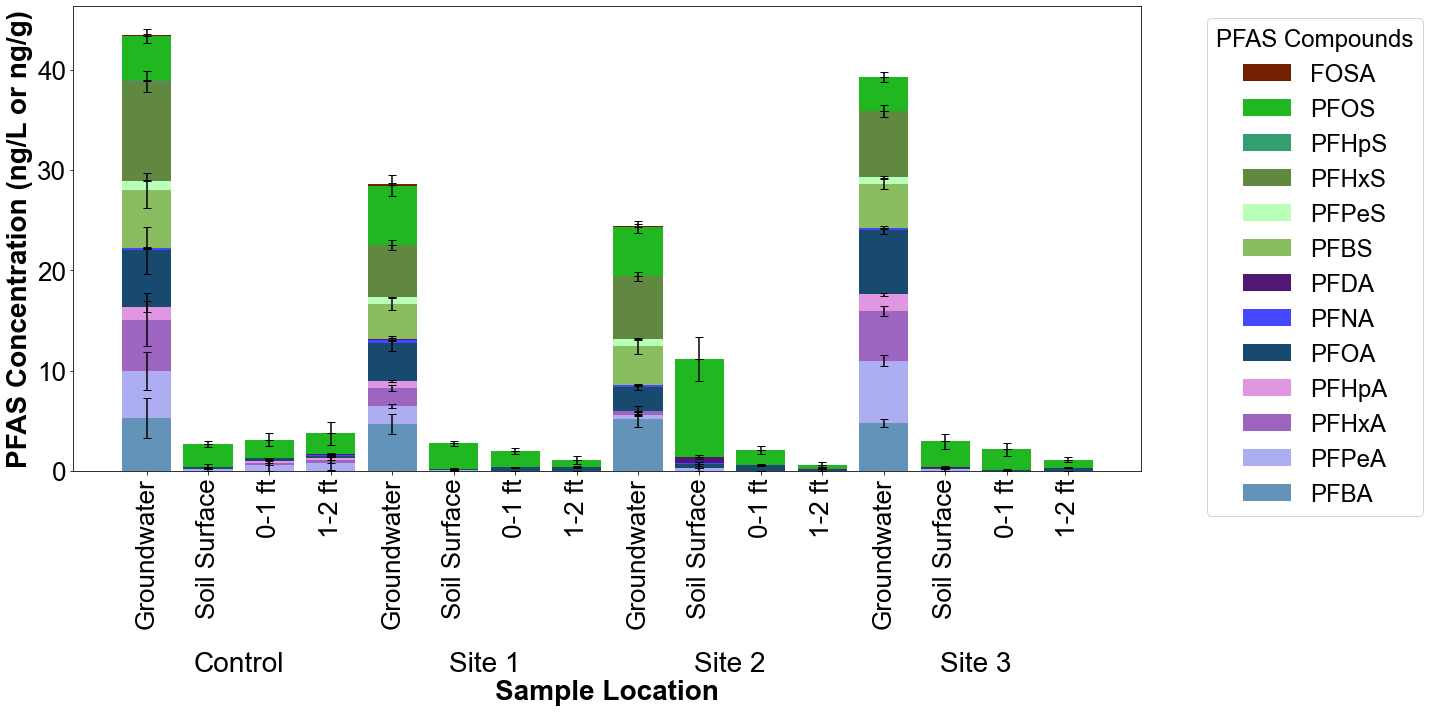

In [254]:
create_stacked_bar_chart_with_errors(summary_df,pfas_colors_dict=compound_colors_dict_abbrev, figsize=(20, 10), figuretitle='')

### Urban Signature

#### Functions

In [311]:
def split_label(label, max_length=16):
    if len(label) <= max_length:
        return label
    
    words = label.split()
    split_labels = []
    current_line = words[0]
    
    for word in words[1:]:
        # Check if adding the next word would exceed the max length
        if len(current_line) + len(word) + 1 > max_length:  # +1 for space
            split_labels.append(current_line)
            current_line = word
        else:
            current_line += ' ' + word
    
    # Append the last line
    split_labels.append(current_line)
    
    return '\n'.join(split_labels)

def create_stacked_bar_chart_with_errors(summary_df, pfas_colors_dict, figsize=(15, 10), figuretitle='Stacked PFAS Concentrations by Category and Sub-Category'):
    """
    Create a stacked bar chart for PFAS compounds concentrations with error bars using specific colors from a dictionary,
    and organize the x-tick labels based on 'Category' and 'Sub-Category'.

    Args:
        summary_df (pd.DataFrame): The summary dataframe that includes 'Category' and 'Sub-Category'.
        pfas_colors_dict (dict): Dictionary mapping PFAS compounds to specific colors.
        figsize (tuple): Figure size for the plot.
        figuretitle (str): Title of the plot.
    """
    avg_columns = [col for col in summary_df.columns if 'Average' in col[0]]
    error_columns = [(col[0].replace('Average', 'StdError'), col[1]) for col in avg_columns]
    
    fig, ax = plt.subplots(figsize=figsize)
    cumulative_values = np.zeros(len(summary_df))
    legend_bars = []

    for (avg_col, error_col) in zip(avg_columns, error_columns):
        compound_name = avg_col[1]
        color = pfas_colors_dict.get(compound_name, 'grey')

        bars = ax.bar(summary_df.index, summary_df[avg_col], bottom=cumulative_values, label=compound_name, color=color)
        legend_bars.append((bars, compound_name))
        
        error_values = summary_df[error_col]
        segment_top = cumulative_values + summary_df[avg_col].fillna(0)
        ax.errorbar(summary_df.index, segment_top, yerr=error_values, fmt='none', ecolor='black', capsize=4)
        
        cumulative_values += summary_df[avg_col].fillna(0)

    ax.set_title(figuretitle)
    ax.set_ylabel('PFAS Concentration (ng/L)')
    ax.set_xlabel('Sample Location', labelpad=50)

    ax.set_xticks(np.arange(len(summary_df)))
    ax.set_xticklabels([split_label(label) for label in summary_df['Sub-Category']], rotation=0, ha='center')

    category_labels = summary_df['Category'].unique()
    category_positions = [np.mean(np.where(summary_df['Category'] == category)[0]) for category in category_labels]
    for label, pos in zip(category_labels, category_positions):
        ax.text(pos, -10, label, ha='center', va='top', rotation=0, fontsize=28)

    handles, labels = zip(*[(bar[0], label) for bar, label in legend_bars])
    ax.legend(handles[::-1], labels[::-1], title='PFAS Compounds', bbox_to_anchor=(0.5, -0.5), loc='lower center',ncol=7)

    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()



#### Filters and Settings

In [278]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
start_date='2019-01-15'

#end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
end_date='2024-07-15'

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Thomas Dairy Control Site Well','Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well',
                          'Fanno at Durham Rd','Rock @ Brookwood','Durham Effluent']


#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',	'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid',
                      'Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',	'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)',	'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

In [279]:
# Define the data for category mapping
category_data = {
    'Sample Location': [
        'Fanno at Durham Rd',
        'Rock @ Brookwood',
        'Durham Effluent',
        'Thomas Dairy Control Site Well', 
        'Thomas Dairy Site 1 Well', 
        'Thomas Dairy Site 2 Well', 
        'Thomas Dairy Site 3 Well', 
    ],

    'Category': [
        'Ambient',
        'Ambient',
        'Effluent',
        'Groundwater',  
        'Groundwater',  
        'Groundwater',  
        'Groundwater', 
    ],
    'Sub-Category': [
        'Fanno at Durham Rd',
        'Rock @ Brookwood',
        'Durham Effluent',
        'Thomas Dairy Control Site Well', 
        'Thomas Dairy Site 1 Well', 
        'Thomas Dairy Site 2 Well', 
        'Thomas Dairy Site 3 Well', 
    ]
}

# Create the DataFrame
category_mapping = pd.DataFrame(category_data)

In [280]:
category_mapping

,Sample Location,Category,Sub-Category
0,Fanno at Durham Rd,Ambient,Fanno at Durham Rd
1,Rock @ Brookwood,Ambient,Rock @ Brookwood
2,Durham Effluent,Effluent,Durham Effluent
3,Thomas Dairy Control Site Well,Groundwater,Thomas Dairy Control Site Well
4,Thomas Dairy Site 1 Well,Groundwater,Thomas Dairy Site 1 Well
5,Thomas Dairy Site 2 Well,Groundwater,Thomas Dairy Site 2 Well
6,Thomas Dairy Site 3 Well,Groundwater,Thomas Dairy Site 3 Well


#### Create Pivot Table for Average Concentrations for PFAS Compounds at Sample Locations

In [281]:
avg_pivot, std_pivot, count_pivot=create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter)

In [282]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot.columns]
# Reorder columns by indexing df with the desired order
avg_pivot = avg_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
avg_pivot.columns = avg_pivot.columns.map(pfas_mapping)
avg_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Durham Effluent,5.615385,9.030769,12.630769,1.892308,20.038462,1.074615,0.814615,4.492308,0.233846,1.653846,0.000000,5.538462,0.000000
Fanno at Durham Rd,3.825000,5.650000,5.250000,2.550000,5.600000,1.047500,0.910000,5.050000,0.572500,3.800000,0.000000,11.475000,0.095000
Rock @ Brookwood,4.066667,4.866667,4.433333,2.000000,4.933333,1.003333,0.670000,3.966667,0.126667,2.500000,0.000000,8.500000,0.123333
Thomas Dairy Control Site Well,5.300000,4.630000,5.133333,1.320000,5.600000,0.216667,0.000000,5.766667,0.960000,9.933333,0.083333,4.466667,0.096667
Thomas Dairy Site 1 Well,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.133333,3.550000,0.600000,5.233333,0.000000,5.900000,0.203333


In [283]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in std_pivot.columns]
# Reorder columns by indexing df with the desired order
std_pivot = std_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
std_pivot.columns = std_pivot.columns.map(pfas_mapping)
std_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Durham Effluent,2.950663,2.532912,3.076899,1.124323,25.306967,0.806852,0.745259,1.865682,0.746922,0.996339,0.000000,3.051103,0.000000
Fanno at Durham Rd,0.320156,0.465475,0.500000,0.264575,3.737200,0.060759,0.303095,0.591608,0.009574,0.883176,0.000000,1.941434,0.190000
Rock @ Brookwood,0.416333,0.929157,0.493288,0.100000,0.057735,0.085049,0.253574,0.862168,0.219393,0.754983,0.000000,1.113553,0.213620
Thomas Dairy Control Site Well,3.477068,3.252799,4.579665,0.919348,3.983717,0.192959,0.000000,3.106981,0.069282,1.847521,0.144338,1.234234,0.167432
Thomas Dairy Site 1 Well,1.732051,0.346410,0.585947,0.160728,1.266228,0.136504,0.230940,0.919239,0.040000,0.808290,0.000000,1.819341,0.176730


In [284]:
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in count_pivot.columns]
# Reorder columns by indexing df with the desired order
count_pivot = count_pivot[filtered_order]
# Rename the index of data_df using the mapping (No need to change)
count_pivot.columns = count_pivot.columns.map(pfas_mapping)
count_pivot.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFBS,PFPeS,PFHxS,PFHpS,PFOS,FOSA
Sample Location,,,,,,,,,,,,,
Durham Effluent,13,13,13,13,13,13,13,13,13,13,13,13,13
Fanno at Durham Rd,4,4,4,4,4,4,4,4,4,4,4,4,4
Rock @ Brookwood,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Well,3,3,3,3,3,3,3,2,3,3,3,3,3


#### Create Summary Dataframe

In [285]:
summary_df=create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping)
summary_df['Category-SubCategory']=summary_df['Category']+', '+summary_df['Sub-Category']
summary_df

<ipython-input-241-f0d42e60927d>:24: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')


,"(Sample Location, )","(Average, PFBA)","(Average, PFPeA)","(Average, PFHxA)","(Average, PFHpA)","(Average, PFOA)","(Average, PFNA)","(Average, PFDA)","(Average, PFBS)","(Average, PFPeS)",...,"(StdError, PFDA)","(StdError, PFBS)","(StdError, PFPeS)","(StdError, PFHxS)","(StdError, PFHpS)","(StdError, PFOS)","(StdError, FOSA)",Category,Sub-Category,Category-SubCategory
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Effluent,Durham Effluent,5.615385,9.030769,12.630769,1.892308,20.038462,1.074615,0.814615,4.492308,0.233846,...,0.206698,0.517447,0.207159,0.276335,0.000000,0.846224,0.000000,Effluent,Durham Effluent,"Effluent, Durham Effluent"
Fanno at Durham Rd,Fanno at Durham Rd,3.825000,5.650000,5.250000,2.550000,5.600000,1.047500,0.910000,5.050000,0.572500,...,0.151548,0.295804,0.004787,0.441588,0.000000,0.970717,0.095000,Ambient,Fanno at Durham Rd,"Ambient, Fanno at Durham Rd"
Rock @ Brookwood,Rock @ Brookwood,4.066667,4.866667,4.433333,2.000000,4.933333,1.003333,0.670000,3.966667,0.126667,...,0.146401,0.497773,0.126667,0.435890,0.000000,0.642910,0.123333,Ambient,Rock @ Brookwood,"Ambient, Rock @ Brookwood"
Thomas Dairy Control Site Well,Thomas Dairy Control Site Well,5.300000,4.630000,5.133333,1.320000,5.600000,0.216667,0.000000,5.766667,0.960000,...,0.000000,1.793817,0.040000,1.066667,0.083333,0.712585,0.096667,Groundwater,Thomas Dairy Control Site Well,"Groundwater, Thomas Dairy Control Site Well"
Thomas Dairy Site 1 Well,Thomas Dairy Site 1 Well,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.133333,3.550000,0.600000,...,0.133333,0.650000,0.023094,0.466667,0.000000,1.050397,0.102035,Groundwater,Thomas Dairy Site 1 Well,"Groundwater, Thomas Dairy Site 1 Well"
Thomas Dairy Site 2 Well,Thomas Dairy Site 2 Well,5.133333,0.426667,0.433333,0.000000,2.400000,0.146667,0.000000,3.866667,0.733333,...,0.000000,0.779601,0.087433,0.466667,0.000000,0.584047,0.120000,Groundwater,Thomas Dairy Site 2 Well,"Groundwater, Thomas Dairy Site 2 Well"
Thomas Dairy Site 3 Well,Thomas Dairy Site 3 Well,4.766667,6.233333,4.966667,1.633333,6.433333,0.143333,0.000000,4.433333,0.720000,...,0.000000,0.497773,0.081854,0.578312,0.000000,0.503322,0.000000,Groundwater,Thomas Dairy Site 3 Well,"Groundwater, Thomas Dairy Site 3 Well"


In [286]:
# Define the specific orders
category_order = ['Ambient', 'Effluent', 'Groundwater']
sub_category_order = [
    'Fanno at Durham Rd',
    'Rock @ Brookwood',
    'Durham Effluent',
    'Thomas Dairy Control Site Well',
    'Thomas Dairy Site 1 Well',
    'Thomas Dairy Site 2 Well',
    'Thomas Dairy Site 3 Well'
]

# Convert 'Category' and 'Sub-Category' to categorical types with defined orders
summary_df['Category'] = pd.Categorical(summary_df['Category'], categories=category_order, ordered=True)
summary_df['Sub-Category'] = pd.Categorical(summary_df['Sub-Category'], categories=sub_category_order, ordered=True)

# Sort summary_df by 'Category' and 'Sub-Category'
summary_df.sort_values(by=['Category', 'Sub-Category'], inplace=True)

# Verify the new order of rows
summary_df


,"(Sample Location, )","(Average, PFBA)","(Average, PFPeA)","(Average, PFHxA)","(Average, PFHpA)","(Average, PFOA)","(Average, PFNA)","(Average, PFDA)","(Average, PFBS)","(Average, PFPeS)",...,"(StdError, PFDA)","(StdError, PFBS)","(StdError, PFPeS)","(StdError, PFHxS)","(StdError, PFHpS)","(StdError, PFOS)","(StdError, FOSA)",Category,Sub-Category,Category-SubCategory
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno at Durham Rd,Fanno at Durham Rd,3.825000,5.650000,5.250000,2.550000,5.600000,1.047500,0.910000,5.050000,0.572500,...,0.151548,0.295804,0.004787,0.441588,0.000000,0.970717,0.095000,Ambient,Fanno at Durham Rd,"Ambient, Fanno at Durham Rd"
Rock @ Brookwood,Rock @ Brookwood,4.066667,4.866667,4.433333,2.000000,4.933333,1.003333,0.670000,3.966667,0.126667,...,0.146401,0.497773,0.126667,0.435890,0.000000,0.642910,0.123333,Ambient,Rock @ Brookwood,"Ambient, Rock @ Brookwood"
Durham Effluent,Durham Effluent,5.615385,9.030769,12.630769,1.892308,20.038462,1.074615,0.814615,4.492308,0.233846,...,0.206698,0.517447,0.207159,0.276335,0.000000,0.846224,0.000000,Effluent,Durham Effluent,"Effluent, Durham Effluent"
Thomas Dairy Control Site Well,Thomas Dairy Control Site Well,5.300000,4.630000,5.133333,1.320000,5.600000,0.216667,0.000000,5.766667,0.960000,...,0.000000,1.793817,0.040000,1.066667,0.083333,0.712585,0.096667,Groundwater,Thomas Dairy Control Site Well,"Groundwater, Thomas Dairy Control Site Well"
Thomas Dairy Site 1 Well,Thomas Dairy Site 1 Well,4.700000,1.800000,1.766667,0.693333,3.766667,0.283333,0.133333,3.550000,0.600000,...,0.133333,0.650000,0.023094,0.466667,0.000000,1.050397,0.102035,Groundwater,Thomas Dairy Site 1 Well,"Groundwater, Thomas Dairy Site 1 Well"
Thomas Dairy Site 2 Well,Thomas Dairy Site 2 Well,5.133333,0.426667,0.433333,0.000000,2.400000,0.146667,0.000000,3.866667,0.733333,...,0.000000,0.779601,0.087433,0.466667,0.000000,0.584047,0.120000,Groundwater,Thomas Dairy Site 2 Well,"Groundwater, Thomas Dairy Site 2 Well"
Thomas Dairy Site 3 Well,Thomas Dairy Site 3 Well,4.766667,6.233333,4.966667,1.633333,6.433333,0.143333,0.000000,4.433333,0.720000,...,0.000000,0.497773,0.081854,0.578312,0.000000,0.503322,0.000000,Groundwater,Thomas Dairy Site 3 Well,"Groundwater, Thomas Dairy Site 3 Well"


#### Create Stacked Bar chart

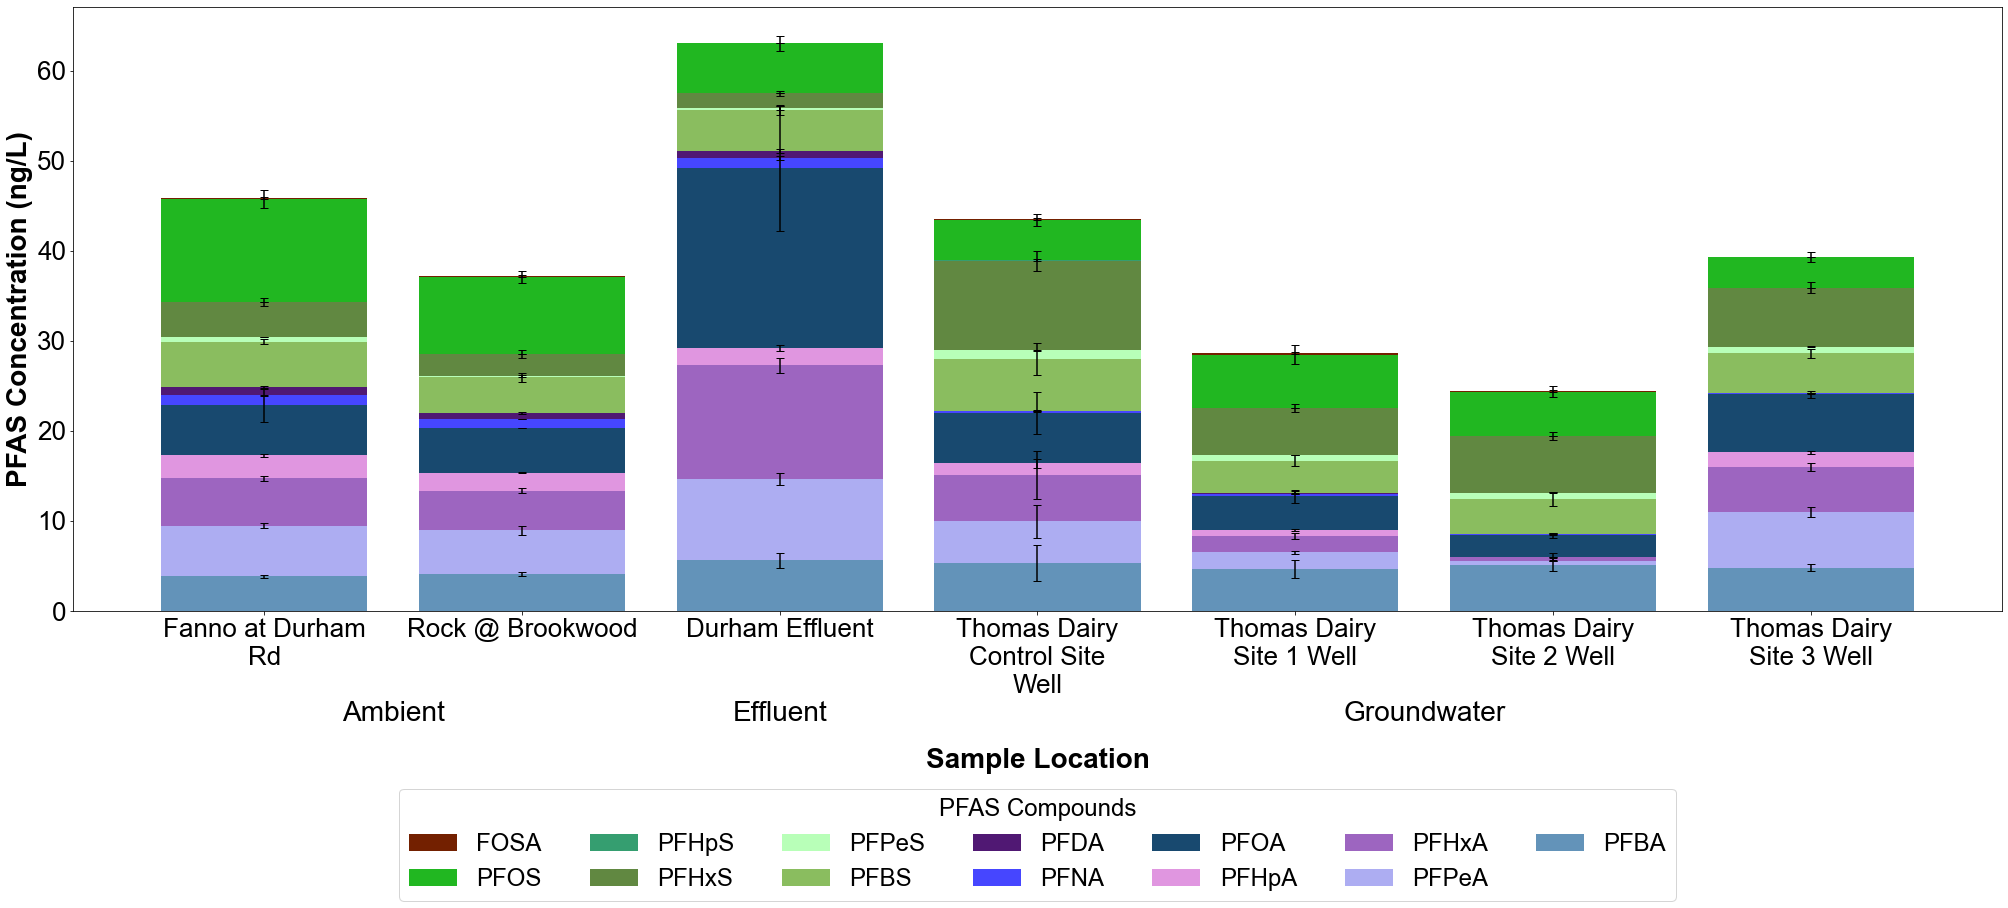

In [310]:
create_stacked_bar_chart_with_errors(summary_df,pfas_colors_dict=compound_colors_dict_abbrev, figsize=(28, 12), figuretitle='')

### Biosolids Amended Field Results

#### Functions

In [241]:
def create_pivot_table(data_df, filter_type=None, filter_qual_summary=None, field_filter=None, pfas_compound_filter=None, aggfunc='mean', region_prefix=None):
    """
    Create a pivot table from the given dataframe with user-defined filters and optional region prefix.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        filter_type (list, optional): Filter values for 'Type'.
        filter_qual_summary (list, optional): Filter values for 'Qual Summary (Grade for filtering)'.
        field_filter (list, optional): Filter values for 'Field'.
        pfas_compound_filter (list, optional): Filter values for 'PFAS Compound'.
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
        region_prefix (str, optional): Prefix to be added to the second level column names.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Apply filters based on user-provided values
    filtered_data = data_df

    if filter_type:
        filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

    if filter_qual_summary:
        filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

    if field_filter:
        filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]

    if pfas_compound_filter:
        filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]

    pivot_table = pd.pivot_table(
        filtered_data,
        values='Quant Incl Estimates Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Region', 'Depth'],
        aggfunc=aggfunc,
        fill_value=np.nan
    )

    # Add prefix to the second level column names if prefix is provided
    if region_prefix:
        pivot_table.columns = pd.MultiIndex.from_tuples(
            [(col[0], f'{region_prefix} {col[1]}' if col[0] != 'Type' and col[0] != 'Depth' else col[1], col[2]) for col in pivot_table.columns]
        )

    return pivot_table

In [242]:
def calculate_standard_error(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate the standard error pivot table, aligning structures if necessary.

    Args:
        average_pivot (pd.DataFrame): Pivot table of averages.
        std_dev_pivot (pd.DataFrame): Pivot table of standard deviations.
        count_pivot (pd.DataFrame): Pivot table of counts.

    Returns:
        pd.DataFrame: Pivot table of standard errors.
    """
    # Align the structure of the std_dev_pivot with average_pivot and count_pivot
    std_dev_pivot_aligned = std_dev_pivot.reindex_like(average_pivot).fillna(np.NaN)

    # Calculate the standard error
    standard_error_pivot = std_dev_pivot_aligned / np.sqrt(count_pivot)

    return standard_error_pivot

In [243]:
def combine_pivot_tables(pivot_table1, pivot_table2, prefix1=None, prefix2=None):
    """
    Combine two pivot tables side by side.

    Args:
        pivot_table1 (pd.DataFrame): First pivot table.
        pivot_table2 (pd.DataFrame): Second pivot table.
        prefix1 (str, optional): Prefix for the columns of the first pivot table.
        prefix2 (str, optional): Prefix for the columns of the second pivot table.

    Returns:
        pd.DataFrame: Combined pivot table.
    """
    # Add prefixes to the column names if provided
    if prefix1:
        pivot_table1 = pivot_table1.add_prefix(f"{prefix1} ")
    if prefix2:
        pivot_table2 = pivot_table2.add_prefix(f"{prefix2} ")

    # Combine the pivot tables side by side
    combined_pivot_table = pd.concat([pivot_table1, pivot_table2], axis=1)

    return combined_pivot_table


In [244]:
def plot_pfas_by_depth(df, pfas_colors_dict, figsize=(15, 10)):
    """
    Plots a bar chart of PFAS concentrations, where each PFAS compound in every unique column is represented by a side-by-side bar, colored based on a specified dictionary.

    Args:
    df (pd.DataFrame): DataFrame with PFAS concentrations. The columns are MultiIndexed with depth as the smallest level.
    pfas_colors_dict (dict): Dictionary mapping PFAS compounds to specific colors.
    figsize (tuple): Figure size for the plot.
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Number of PFAS compounds
    num_pfas = len(df.index)
    # Width of each individual bar
    total_width = 0.8
    bar_width = total_width / num_pfas

    # Loop over each PFAS compound
    for i, compound in enumerate(df.index):
        offsets = np.arange(len(df.columns))
        # Calculate offset for each compound
        compound_offsets = offsets + (i - num_pfas / 2) * bar_width + bar_width / 2
        color = pfas_colors_dict.get(compound, 'grey')  # Default to grey if not specified

        # Plot each compound's concentration in each column
        ax.bar(compound_offsets, df.loc[compound], width=bar_width, label=compound, color=color)

    # Set x-ticks to be in the middle of the group of bars for each column
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels([col[-1] for col in df.columns], rotation=90)  # Use the last element from each MultiIndex column for labeling

    # Labelling axes
    ax.set_xlabel('')
    ax.set_ylabel('PFAS Concentration (ng/g)')
    ax.set_title('')

    # Legend
    ax.legend(title="PFAS Compounds", loc='lower center',bbox_to_anchor=(0.5, -0.7),ncol=6)

    plt.tight_layout()
    plt.show()

# Example usage
# pfas_colors_dict = {'PFOS': 'blue', 'PFOA': 'red', ...}
# plot_pfas_by_depth(your_dataframe, pfas_colors_dict)


In [267]:
def plot_pfas_by_depth(df, error_df, pfas_colors_dict, figsize=(15, 10)):
    """
    Plots a bar chart of PFAS concentrations with error bars, where each PFAS compound in every unique column 
    is represented by a side-by-side bar, colored based on a specified dictionary.

    Args:
        df (pd.DataFrame): DataFrame with PFAS average concentrations.
        error_df (pd.DataFrame): DataFrame with PFAS standard errors or deviations.
        pfas_colors_dict (dict): Dictionary mapping PFAS compounds to specific colors.
        figsize (tuple): Figure size for the plot.
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Number of PFAS compounds
    num_pfas = len(df.index)
    # Width of each individual bar
    total_width = 1
    bar_width = total_width / num_pfas

    # Loop over each PFAS compound
    for i, compound in enumerate(df.index):
        offsets = np.arange(len(df.columns))
        # Calculate offset for each compound
        compound_offsets = offsets + (i - num_pfas / 2) * bar_width + bar_width / 2
        color = pfas_colors_dict.get(compound, 'grey')  # Default to grey if not specified

        # Plot each compound's concentration in each column with error bars
        ax.bar(compound_offsets, df.loc[compound], width=bar_width, label=compound, color=color,
               yerr=error_df.loc[compound], capsize=5)  # Error bars with capsize

    # Set x-ticks to be in the middle of the group of bars for each column
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels([col[-1] for col in df.columns], rotation=90)  # Use the last element from each MultiIndex column for labeling

    # Labelling axes
    ax.set_xlabel('')
    ax.set_ylabel('PFAS Concentration (ng/g)')
    ax.set_title('')

    # Legend
    #ax.legend(title="PFAS Compounds", loc='lower center',bbox_to_anchor=(0.5, -0.7),ncol=8)

    plt.tight_layout()
    plt.show()


#### Settings and Filters

In [272]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
filter_qual_summary = ['Good','Probably Ok','']
#field_filter (list): Filter values for 'Field'.
field_filter = ['nan', 'LINPMM21-31','SHRMMR07-HE','SHRJHD16-BD', 'LINPMM19-40', 'SHRBTG30-AX', 'SHRBTG30-DX','SHRMMR30-CX', 'SHRMMR31-AX']
#type_filter (list): Filter values for 'Type'.
filter_type= ['Biosolids','Soils']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['NEtFOSAA','NMeFOSAA','NMeFOSE','Perfluorodecanoic acid','Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                      'Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                      'Perfluoropentanoic acid','Perfluoroundecanoic acid','5:3 FTCA']

#### Biosolids Pivot Tables

In [273]:
filter_type=['Biosolids']
field_filter=None
aggfunc='mean'
filtered_data = data_df

if filter_type:
    filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

if filter_qual_summary:
    filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

if field_filter:
    filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]

if pfas_compound_filter:
    filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]

Biosolids_Avg_Pivot = pd.pivot_table(
    filtered_data,
    values='Quant Incl Estimates Incl Qual Flags',
    index='PFAS Compound',
    columns=['Type'],
    aggfunc=aggfunc,
    fill_value=np.nan
)


Biosolids_Avg_Pivot.index = Biosolids_Avg_Pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in Biosolids_Avg_Pivot.index]
# Reorder the DataFrame
Biosolids_Avg_Pivot = Biosolids_Avg_Pivot.loc[filtered_order]
Biosolids_Avg_Pivot


Type,Biosolids
PFAS Compound,
5:3FTCA,82.666667
PFPeA,0.023333
PFHxA,0.888696
PFHpA,0.026667
PFOA,1.391250
PFNA,1.385000
PFDA,4.100000
PFUnA,2.937500
PFDoA,2.573913


In [274]:
filter_type=['Biosolids']
field_filter=None
aggfunc='std'
filtered_data = data_df

if filter_type:
    filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

if filter_qual_summary:
    filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

if field_filter:
    filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]

if pfas_compound_filter:
    filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]

Biosolids_Std_Pivot = pd.pivot_table(
    filtered_data,
    values='Quant Incl Estimates Incl Qual Flags',
    index='PFAS Compound',
    columns=['Type'],
    aggfunc=aggfunc,
    fill_value=np.nan
)

Biosolids_Std_Pivot.index = Biosolids_Std_Pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in Biosolids_Std_Pivot.index]
# Reorder the DataFrame
Biosolids_Std_Pivot = Biosolids_Std_Pivot.loc[filtered_order]
Biosolids_Std_Pivot

Type,Biosolids
PFAS Compound,
5:3FTCA,34.428670
PFPeA,0.114310
PFHxA,0.628731
PFHpA,0.074054
PFOA,1.564640
PFNA,1.504775
PFDA,1.861329
PFUnA,1.988185
PFDoA,1.570240


In [275]:
filter_type=['Biosolids']
field_filter=None
aggfunc='count'
filtered_data = data_df

if filter_type:
    filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

if filter_qual_summary:
    filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

if field_filter:
    filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]

if pfas_compound_filter:
    filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]

Biosolids_Count_Pivot = pd.pivot_table(
    filtered_data,
    values='Quant Incl Estimates Incl Qual Flags',
    index='PFAS Compound',
    columns=['Type'],
    aggfunc=aggfunc,
    fill_value=np.nan
)


Biosolids_Count_Pivot.index = Biosolids_Count_Pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in Biosolids_Count_Pivot.index]
# Reorder the DataFrame
Biosolids_Count_Pivot = Biosolids_Count_Pivot.loc[filtered_order]
Biosolids_Count_Pivot

Type,Biosolids
PFAS Compound,
5:3FTCA,3
PFPeA,24
PFHxA,23
PFHpA,24
PFOA,24
PFNA,24
PFDA,23
PFUnA,24
PFDoA,23


In [276]:
Biosolids_error_pivot=calculate_standard_error(Biosolids_Avg_Pivot, Biosolids_Std_Pivot, Biosolids_Count_Pivot)
Biosolids_error_pivot

Type,Biosolids
PFAS Compound,
5:3FTCA,19.877402
PFPeA,0.023333
PFHxA,0.131099
PFHpA,0.015116
PFOA,0.319381
PFNA,0.307161
PFDA,0.388114
PFUnA,0.405837
PFDoA,0.327418


####  Create Pivot Table for Average PFAS Concentrations

In [277]:
#field_filter (list): Filter values for 'Field'.
field_filter = ['nan', 'LINPMM21-31','SHRMMR07-HE','SHRJHD16-BD', 'LINPMM19-40', 'SHRBTG30-AX', 'SHRBTG30-DX','SHRMMR30-CX', 'SHRMMR31-AX']
#type_filter (list): Filter values for 'Type'.
filter_type= ['Biosolids','Soils']

In [278]:
average_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='mean')
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

average_pivot

Type                   Soils                                                  \
Region        Eastern Oregon                     Willamette Valley             
Depth                 0-1 ft    1-2 ft   Surface            0-1 ft    1-2 ft   
PFAS Compound                                                                  
5:3FTCA             0.000000  0.000000  0.000000               NaN       NaN   
PFPeA               0.415455  0.654545  0.000000          0.157778  0.042222   
PFHxA               0.200000  0.403636  0.020000          0.102222  0.065556   
PFHpA               0.309091  0.221818  0.076286          0.065556  0.097778   
PFOA                1.480000  0.194545  2.581429          1.035556  1.117778   
PFNA                0.149636  0.000000  1.065714          0.163333  0.088889   
PFDA                0.225545  0.036273  2.015714          0.213333  0.000000   
PFUnA               0.018182  0.000000  0.400000          0.028889  0.000000   
PFDoA               0.048182  0.000000  0.590000          0.000000  0.000000   
NEtFOSAA            0.163000  0.000000  1.338571          0.244444  0.000000   
NMeFOSAA            0.019091  0.000000  0.707143          0.000000  0.000000   
PFOS                0.291364  0.064727  2.727143          3.960000  2.007778   
FOSA                0.020000  0.000000  0.521429          0.098889  0.000000   
NMeFOSE             0.000000  0.000000  0.000000          0.000000  0.000000   

Type                     
Region                   
Depth           Surface  
PFAS Compound            
5:3FTCA             NaN  
PFPeA          0.315000  
PFHxA          0.038333  
PFHpA          0.000000  
PFOA           0.613333  
PFNA           0.256667  
PFDA           0.685000  
PFUnA          0.193333  
PFDoA          0.196667  
NEtFOSAA       0.496667  
NMeFOSAA       0.081667  
PFOS           4.883333  
FOSA           0.000000  
NMeFOSE        0.000000

In [279]:
std_dev_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='std')

std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in std_dev_pivot.index]
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

std_dev_pivot

Type                   Soils                                                  \
Region        Eastern Oregon                     Willamette Valley             
Depth                 0-1 ft    1-2 ft   Surface            0-1 ft    1-2 ft   
PFAS Compound                                                                  
5:3FTCA             0.000000  0.000000  0.000000               NaN       NaN   
PFPeA               0.395964  0.425120  0.000000          0.154740  0.126667   
PFHxA               0.187936  0.247922  0.048990          0.154011  0.134081   
PFHpA               0.225409  0.304001  0.107935          0.130299  0.196327   
PFOA                1.548774  0.200218  2.238485          0.350218  1.333293   
PFNA                0.198720  0.000000  0.640257          0.197927  0.176383   
PFDA                0.314191  0.099593  1.373582          0.209045  0.000000   
PFUnA               0.060302  0.000000  0.300389          0.086667  0.000000   
PFDoA               0.107407  0.000000  0.365878          0.000000  0.000000   
NEtFOSAA            0.248866  0.000000  1.667357          0.382103  0.000000   
NMeFOSAA            0.063317  0.000000  0.688470          0.000000  0.000000   
PFOS                0.365377  0.125051  1.733404          3.345792  2.490491   
FOSA                0.066332  0.000000  0.685479          0.149536  0.000000   
NMeFOSE             0.000000  0.000000  0.000000          0.000000  0.000000   

Type                     
Region                   
Depth           Surface  
PFAS Compound            
5:3FTCA             NaN  
PFPeA          0.185553  
PFHxA          0.093897  
PFHpA          0.000000  
PFOA           0.195516  
PFNA           0.166213  
PFDA           0.263572  
PFUnA          0.163666  
PFDoA          0.189491  
NEtFOSAA       0.515700  
NMeFOSAA       0.126873  
PFOS           1.321237  
FOSA           0.000000  
NMeFOSE        0.000000

In [280]:
count_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='count')

count_pivot.index = count_pivot.index.map(pfas_mapping)
desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in count_pivot.index]
# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

count_pivot

Type                   Soils                                                
Region        Eastern Oregon                Willamette Valley               
Depth                 0-1 ft 1-2 ft Surface            0-1 ft 1-2 ft Surface
PFAS Compound                                                               
5:3FTCA                    3      3       3               NaN    NaN     NaN
PFPeA                     11     11       7               9.0    9.0     6.0
PFHxA                     11     11       6               9.0    9.0     6.0
PFHpA                     11     11       7               9.0    9.0     6.0
PFOA                      11     11       7               9.0    9.0     6.0
PFNA                      11     11       7               9.0    9.0     6.0
PFDA                      11     11       7               9.0    9.0     6.0
PFUnA                     11     11       7               9.0    9.0     6.0
PFDoA                     11     11       7               9.0    9.0     6.0
NEtFOSAA                  10     11       7               9.0    9.0     6.0
NMeFOSAA                  11     11       7               9.0    9.0     6.0
PFOS                      11     11       7               9.0    9.0     6.0
FOSA                      11     11       7               9.0    9.0     6.0
NMeFOSE                    7      7       7               9.0    9.0     6.0

In [281]:
error_pivot=calculate_standard_error(average_pivot, std_dev_pivot, count_pivot)
error_pivot

Type                   Soils                                                  \
Region        Eastern Oregon                     Willamette Valley             
Depth                 0-1 ft    1-2 ft   Surface            0-1 ft    1-2 ft   
PFAS Compound                                                                  
5:3FTCA             0.000000  0.000000  0.000000               NaN       NaN   
PFPeA               0.119388  0.128179  0.000000          0.051580  0.042222   
PFHxA               0.056665  0.074751  0.020000          0.051337  0.044694   
PFHpA               0.067963  0.091660  0.040795          0.043433  0.065442   
PFOA                0.466973  0.060368  0.846068          0.116739  0.444431   
PFNA                0.059916  0.000000  0.241994          0.065976  0.058794   
PFDA                0.094732  0.030028  0.519165          0.069682  0.000000   
PFUnA               0.018182  0.000000  0.113536          0.028889  0.000000   
PFDoA               0.032385  0.000000  0.138289          0.000000  0.000000   
NEtFOSAA            0.078698  0.000000  0.630202          0.127368  0.000000   
NMeFOSAA            0.019091  0.000000  0.260217          0.000000  0.000000   
PFOS                0.110165  0.037704  0.655165          1.115264  0.830164   
FOSA                0.020000  0.000000  0.259087          0.049845  0.000000   
NMeFOSE             0.000000  0.000000  0.000000          0.000000  0.000000   

Type                     
Region                   
Depth           Surface  
PFAS Compound            
5:3FTCA             NaN  
PFPeA          0.075752  
PFHxA          0.038333  
PFHpA          0.000000  
PFOA           0.079819  
PFNA           0.067856  
PFDA           0.107603  
PFUnA          0.066816  
PFDoA          0.077359  
NEtFOSAA       0.210534  
NMeFOSAA       0.051796  
PFOS           0.539393  
FOSA           0.000000  
NMeFOSE        0.000000

####  Create Pivot Tables for Control Site for Average PFAS Concentrations

In [282]:
control_avg_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='mean',region_prefix='Control')

control_avg_pivot.index = control_avg_pivot.index.map(pfas_mapping)
desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in control_avg_pivot.index]
# Reorder the DataFrame
control_avg_pivot = control_avg_pivot.loc[filtered_order]

control_avg_pivot


Soils                                           \
              Control Eastern Oregon                Control Willamette Valley   
                              0-1 ft 1-2 ft Surface                    0-1 ft   
PFAS Compound                                                                   
5:3FTCA                     0.000000      0   0.000                       NaN   
PFPeA                       0.000000      0   0.000                      0.00   
PFHxA                       0.000000      0   0.000                      0.00   
PFHpA                       0.020000      0   0.000                      0.00   
PFOA                        0.031667      0   0.017                      0.00   
PFNA                        0.000000      0   0.000                      0.00   
PFDA                        0.000000      0   0.000                      0.00   
PFUnA                       0.000000      0   0.000                      0.00   
PFDoA                       0.000000      0   0.000                      0.00   
NEtFOSAA                    0.000000      0   0.000                      0.00   
NMeFOSAA                    0.000000      0   0.000                      0.00   
PFOS                        0.000000      0   0.018                      0.54   
FOSA                        0.000000      0   0.000                      0.00   
NMeFOSE                     0.000000      0   0.000                      0.00   

                              
                              
              1-2 ft Surface  
PFAS Compound                 
5:3FTCA          NaN     NaN  
PFPeA            0.0   0.000  
PFHxA            0.0   0.000  
PFHpA            0.0   0.000  
PFOA             0.0   0.320  
PFNA             0.0   0.105  
PFDA             0.0   0.125  
PFUnA            0.0   0.000  
PFDoA            0.0   0.000  
NEtFOSAA         0.0   0.000  
NMeFOSAA         0.0   0.000  
PFOS             0.0   0.685  
FOSA             0.0   0.000  
NMeFOSE          0.0   0.000

In [283]:
control_std_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='std',region_prefix='Control')

control_std_pivot.index = control_std_pivot.index.map(pfas_mapping)
desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in control_std_pivot.index]
# Reorder the DataFrame
control_std_pivot = control_std_pivot.loc[filtered_order]

control_std_pivot

Soils                   \
              Control Eastern Oregon                    
                              0-1 ft 1-2 ft   Surface   
PFAS Compound                                           
PFPeA                       0.000000      0  0.000000   
PFHxA                       0.000000      0  0.000000   
PFHpA                       0.034641      0  0.000000   
PFOA                        0.054848      0  0.029445   
PFNA                        0.000000      0  0.000000   
PFDA                        0.000000      0  0.000000   
PFUnA                       0.000000      0  0.000000   
PFDoA                       0.000000      0  0.000000   
NEtFOSAA                    0.000000      0  0.000000   
NMeFOSAA                    0.000000      0  0.000000   
PFOS                        0.000000      0  0.031177   
FOSA                        0.000000      0  0.000000   
NMeFOSE                     0.000000      0  0.000000   

                                         
              Control Willamette Valley  
                                Surface  
PFAS Compound                            
PFPeA                          0.000000  
PFHxA                          0.000000  
PFHpA                          0.000000  
PFOA                           0.452548  
PFNA                           0.148492  
PFDA                           0.176777  
PFUnA                          0.000000  
PFDoA                          0.000000  
NEtFOSAA                       0.000000  
NMeFOSAA                       0.000000  
PFOS                           0.586899  
FOSA                           0.000000  
NMeFOSE                        0.000000

In [284]:
control_count_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='count',region_prefix='Control')

control_count_pivot.index = control_count_pivot.index.map(pfas_mapping)
desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in control_count_pivot.index]
# Reorder the DataFrame
control_count_pivot = control_count_pivot.loc[filtered_order]

control_count_pivot

Soils                                           \
              Control Eastern Oregon                Control Willamette Valley   
                              0-1 ft 1-2 ft Surface                    0-1 ft   
PFAS Compound                                                                   
5:3FTCA                            1      1       1                       NaN   
PFPeA                              3      3       3                       1.0   
PFHxA                              3      3       3                       1.0   
PFHpA                              3      3       3                       1.0   
PFOA                               3      3       3                       1.0   
PFNA                               3      3       3                       1.0   
PFDA                               3      3       3                       1.0   
PFUnA                              3      3       3                       1.0   
PFDoA                              3      3       3                       1.0   
NEtFOSAA                           3      3       3                       1.0   
NMeFOSAA                           3      3       3                       1.0   
PFOS                               3      3       3                       1.0   
FOSA                               3      3       3                       1.0   
NMeFOSE                            3      3       3                       1.0   

                              
                              
              1-2 ft Surface  
PFAS Compound                 
5:3FTCA          NaN     NaN  
PFPeA            1.0     2.0  
PFHxA            1.0     2.0  
PFHpA            1.0     2.0  
PFOA             1.0     2.0  
PFNA             1.0     2.0  
PFDA             1.0     2.0  
PFUnA            1.0     2.0  
PFDoA            1.0     2.0  
NEtFOSAA         1.0     2.0  
NMeFOSAA         1.0     2.0  
PFOS             1.0     2.0  
FOSA             1.0     2.0  
NMeFOSE          1.0     2.0

In [285]:
control_error_pivot=calculate_standard_error(control_avg_pivot, control_std_pivot, control_count_pivot)
control_error_pivot

Soils                                           \
              Control Eastern Oregon                Control Willamette Valley   
                              0-1 ft 1-2 ft Surface                    0-1 ft   
PFAS Compound                                                                   
5:3FTCA                          NaN    NaN     NaN                       NaN   
PFPeA                       0.000000    0.0   0.000                       NaN   
PFHxA                       0.000000    0.0   0.000                       NaN   
PFHpA                       0.020000    0.0   0.000                       NaN   
PFOA                        0.031667    0.0   0.017                       NaN   
PFNA                        0.000000    0.0   0.000                       NaN   
PFDA                        0.000000    0.0   0.000                       NaN   
PFUnA                       0.000000    0.0   0.000                       NaN   
PFDoA                       0.000000    0.0   0.000                       NaN   
NEtFOSAA                    0.000000    0.0   0.000                       NaN   
NMeFOSAA                    0.000000    0.0   0.000                       NaN   
PFOS                        0.000000    0.0   0.018                       NaN   
FOSA                        0.000000    0.0   0.000                       NaN   
NMeFOSE                     0.000000    0.0   0.000                       NaN   

                              
                              
              1-2 ft Surface  
PFAS Compound                 
5:3FTCA          NaN     NaN  
PFPeA            NaN   0.000  
PFHxA            NaN   0.000  
PFHpA            NaN   0.000  
PFOA             NaN   0.320  
PFNA             NaN   0.105  
PFDA             NaN   0.125  
PFUnA            NaN   0.000  
PFDoA            NaN   0.000  
NEtFOSAA         NaN   0.000  
NMeFOSAA         NaN   0.000  
PFOS             NaN   0.415  
FOSA             NaN   0.000  
NMeFOSE          NaN   0.000

#### Combine Pivot Tables for Comparision with Control Site

In [286]:
avg_all_pivot=combine_pivot_tables(pivot_table1=average_pivot, pivot_table2=control_avg_pivot, prefix1=None, prefix2=None)
avg_all_pivot

Type                   Soils                                                  \
Region        Eastern Oregon                     Willamette Valley             
Depth                 0-1 ft    1-2 ft   Surface            0-1 ft    1-2 ft   
PFAS Compound                                                                  
5:3FTCA             0.000000  0.000000  0.000000               NaN       NaN   
PFPeA               0.415455  0.654545  0.000000          0.157778  0.042222   
PFHxA               0.200000  0.403636  0.020000          0.102222  0.065556   
PFHpA               0.309091  0.221818  0.076286          0.065556  0.097778   
PFOA                1.480000  0.194545  2.581429          1.035556  1.117778   
PFNA                0.149636  0.000000  1.065714          0.163333  0.088889   
PFDA                0.225545  0.036273  2.015714          0.213333  0.000000   
PFUnA               0.018182  0.000000  0.400000          0.028889  0.000000   
PFDoA               0.048182  0.000000  0.590000          0.000000  0.000000   
NEtFOSAA            0.163000  0.000000  1.338571          0.244444  0.000000   
NMeFOSAA            0.019091  0.000000  0.707143          0.000000  0.000000   
PFOS                0.291364  0.064727  2.727143          3.960000  2.007778   
FOSA                0.020000  0.000000  0.521429          0.098889  0.000000   
NMeFOSE             0.000000  0.000000  0.000000          0.000000  0.000000   

Type                                                           \
Region                  Control Eastern Oregon                  
Depth           Surface                 0-1 ft 1-2 ft Surface   
PFAS Compound                                                   
5:3FTCA             NaN               0.000000      0   0.000   
PFPeA          0.315000               0.000000      0   0.000   
PFHxA          0.038333               0.000000      0   0.000   
PFHpA          0.000000               0.020000      0   0.000   
PFOA           0.613333               0.031667      0   0.017   
PFNA           0.256667               0.000000      0   0.000   
PFDA           0.685000               0.000000      0   0.000   
PFUnA          0.193333               0.000000      0   0.000   
PFDoA          0.196667               0.000000      0   0.000   
NEtFOSAA       0.496667               0.000000      0   0.000   
NMeFOSAA       0.081667               0.000000      0   0.000   
PFOS           4.883333               0.000000      0   0.018   
FOSA           0.000000               0.000000      0   0.000   
NMeFOSE        0.000000               0.000000      0   0.000   

Type                                                    
Region        Control Willamette Valley                 
Depth                            0-1 ft 1-2 ft Surface  
PFAS Compound                                           
5:3FTCA                             NaN    NaN     NaN  
PFPeA                              0.00    0.0   0.000  
PFHxA                              0.00    0.0   0.000  
PFHpA                              0.00    0.0   0.000  
PFOA                               0.00    0.0   0.320  
PFNA                               0.00    0.0   0.105  
PFDA                               0.00    0.0   0.125  
PFUnA                              0.00    0.0   0.000  
PFDoA                              0.00    0.0   0.000  
NEtFOSAA                           0.00    0.0   0.000  
NMeFOSAA                           0.00    0.0   0.000  
PFOS                               0.54    0.0   0.685  
FOSA                               0.00    0.0   0.000  
NMeFOSE                            0.00    0.0   0.000

In [287]:
# Add two new levels to df_single
new_levels = [(col,'', 'Biosolids') for col in Biosolids_Avg_Pivot.columns]
Biosolids_Avg_Pivot.columns = pd.MultiIndex.from_tuples(new_levels)
Biosolids_Avg_Pivot

,Biosolids
,
,Biosolids
PFAS Compound,
5:3FTCA,82.666667
PFPeA,0.023333
PFHxA,0.888696
PFHpA,0.026667
PFOA,1.391250
PFNA,1.385000
PFDA,4.100000


In [288]:
def reorder_columns(df):
    # Define custom order for regions and depths
    region_order = {
        "Control Eastern Oregon": 1, 
        "Eastern Oregon": 2, 
        "Control Willamette Valley": 3, 
        "Willamette Valley": 4
    }
    depth_order = {
        'Surface': 1,
        '0-1 ft': 2,
        '1-2 ft': 3
    }

    # Function to create a sort key for each column based on custom order
    def sort_key(col):
        type_, region, depth = col
        # Assign a large number to regions or depths not in the custom order to keep them at the end
        region_rank = region_order.get(region, 999)
        depth_rank = depth_order.get(depth, 999)
        return (region_rank, depth_rank)

    # Sort columns using the custom sort key
    sorted_columns = sorted(df.columns, key=sort_key)

    # Reindex the DataFrame with the sorted columns
    return df.reindex(columns=sorted_columns)

# Assume avg_all_pivot is your DataFrame loaded with the multi-level columns
avg_all_pivot = reorder_columns(avg_all_pivot)

# Print the reordered DataFrame to verify the new column order
avg_all_pivot



Type                           Soils                                  \
Region        Control Eastern Oregon                  Eastern Oregon   
Depth                        Surface    0-1 ft 1-2 ft        Surface   
PFAS Compound                                                          
5:3FTCA                        0.000  0.000000      0       0.000000   
PFPeA                          0.000  0.000000      0       0.000000   
PFHxA                          0.000  0.000000      0       0.020000   
PFHpA                          0.000  0.020000      0       0.076286   
PFOA                           0.017  0.031667      0       2.581429   
PFNA                           0.000  0.000000      0       1.065714   
PFDA                           0.000  0.000000      0       2.015714   
PFUnA                          0.000  0.000000      0       0.400000   
PFDoA                          0.000  0.000000      0       0.590000   
NEtFOSAA                       0.000  0.000000      0       1.338571   
NMeFOSAA                       0.000  0.000000      0       0.707143   
PFOS                           0.018  0.000000      0       2.727143   
FOSA                           0.000  0.000000      0       0.521429   
NMeFOSE                        0.000  0.000000      0       0.000000   

Type                                                                       \
Region                            Control Willamette Valley                 
Depth            0-1 ft    1-2 ft                   Surface 0-1 ft 1-2 ft   
PFAS Compound                                                               
5:3FTCA        0.000000  0.000000                       NaN    NaN    NaN   
PFPeA          0.415455  0.654545                     0.000   0.00    0.0   
PFHxA          0.200000  0.403636                     0.000   0.00    0.0   
PFHpA          0.309091  0.221818                     0.000   0.00    0.0   
PFOA           1.480000  0.194545                     0.320   0.00    0.0   
PFNA           0.149636  0.000000                     0.105   0.00    0.0   
PFDA           0.225545  0.036273                     0.125   0.00    0.0   
PFUnA          0.018182  0.000000                     0.000   0.00    0.0   
PFDoA          0.048182  0.000000                     0.000   0.00    0.0   
NEtFOSAA       0.163000  0.000000                     0.000   0.00    0.0   
NMeFOSAA       0.019091  0.000000                     0.000   0.00    0.0   
PFOS           0.291364  0.064727                     0.685   0.54    0.0   
FOSA           0.020000  0.000000                     0.000   0.00    0.0   
NMeFOSE        0.000000  0.000000                     0.000   0.00    0.0   

Type                                                 
Region        Willamette Valley                      
Depth                   Surface    0-1 ft    1-2 ft  
PFAS Compound                                        
5:3FTCA                     NaN       NaN       NaN  
PFPeA                  0.315000  0.157778  0.042222  
PFHxA                  0.038333  0.102222  0.065556  
PFHpA                  0.000000  0.065556  0.097778  
PFOA                   0.613333  1.035556  1.117778  
PFNA                   0.256667  0.163333  0.088889  
PFDA                   0.685000  0.213333  0.000000  
PFUnA                  0.193333  0.028889  0.000000  
PFDoA                  0.196667  0.000000  0.000000  
NEtFOSAA               0.496667  0.244444  0.000000  
NMeFOSAA               0.081667  0.000000  0.000000  
PFOS                   4.883333  3.960000  2.007778  
FOSA                   0.000000  0.098889  0.000000  
NMeFOSE                0.000000  0.000000  0.000000

In [289]:
# Combine the pivot tables side by side
avg_all_pivot = pd.concat([Biosolids_Avg_Pivot,avg_all_pivot], axis=1)

avg_all_pivot

Biosolids                  Soils                   \
                         Control Eastern Oregon                    
               Biosolids                Surface    0-1 ft 1-2 ft   
PFAS Compound                                                      
5:3FTCA        82.666667                  0.000  0.000000      0   
PFPeA           0.023333                  0.000  0.000000      0   
PFHxA           0.888696                  0.000  0.000000      0   
PFHpA           0.026667                  0.000  0.020000      0   
PFOA            1.391250                  0.017  0.031667      0   
PFNA            1.385000                  0.000  0.000000      0   
PFDA            4.100000                  0.000  0.000000      0   
PFUnA           2.937500                  0.000  0.000000      0   
PFDoA           2.573913                  0.000  0.000000      0   
NEtFOSAA        4.982609                  0.000  0.000000      0   
NMeFOSAA       14.208333                  0.000  0.000000      0   
PFOS           14.162500                  0.018  0.000000      0   
FOSA            0.893333                  0.000  0.000000      0   
NMeFOSE         6.447619                  0.000  0.000000      0   

                                                                            \
              Eastern Oregon                     Control Willamette Valley   
                     Surface    0-1 ft    1-2 ft                   Surface   
PFAS Compound                                                                
5:3FTCA             0.000000  0.000000  0.000000                       NaN   
PFPeA               0.000000  0.415455  0.654545                     0.000   
PFHxA               0.020000  0.200000  0.403636                     0.000   
PFHpA               0.076286  0.309091  0.221818                     0.000   
PFOA                2.581429  1.480000  0.194545                     0.320   
PFNA                1.065714  0.149636  0.000000                     0.105   
PFDA                2.015714  0.225545  0.036273                     0.125   
PFUnA               0.400000  0.018182  0.000000                     0.000   
PFDoA               0.590000  0.048182  0.000000                     0.000   
NEtFOSAA            1.338571  0.163000  0.000000                     0.000   
NMeFOSAA            0.707143  0.019091  0.000000                     0.000   
PFOS                2.727143  0.291364  0.064727                     0.685   
FOSA                0.521429  0.020000  0.000000                     0.000   
NMeFOSE             0.000000  0.000000  0.000000                     0.000   

                                                                   
                            Willamette Valley                      
              0-1 ft 1-2 ft           Surface    0-1 ft    1-2 ft  
PFAS Compound                                                      
5:3FTCA          NaN    NaN               NaN       NaN       NaN  
PFPeA           0.00    0.0          0.315000  0.157778  0.042222  
PFHxA           0.00    0.0          0.038333  0.102222  0.065556  
PFHpA           0.00    0.0          0.000000  0.065556  0.097778  
PFOA            0.00    0.0          0.613333  1.035556  1.117778  
PFNA            0.00    0.0          0.256667  0.163333  0.088889  
PFDA            0.00    0.0          0.685000  0.213333  0.000000  
PFUnA           0.00    0.0          0.193333  0.028889  0.000000  
PFDoA           0.00    0.0          0.196667  0.000000  0.000000  
NEtFOSAA        0.00    0.0          0.496667  0.244444  0.000000  
NMeFOSAA        0.00    0.0          0.081667  0.000000  0.000000  
PFOS            0.54    0.0          4.883333  3.960000  2.007778  
FOSA            0.00    0.0          0.000000  0.098889  0.000000  
NMeFOSE         0.00    0.0          0.000000  0.000000  0.000000

In [290]:
error_all_pivot=combine_pivot_tables(pivot_table1=error_pivot, pivot_table2=control_error_pivot, prefix1=None, prefix2=None)
error_all_pivot

Type                   Soils                                                  \
Region        Eastern Oregon                     Willamette Valley             
Depth                 0-1 ft    1-2 ft   Surface            0-1 ft    1-2 ft   
PFAS Compound                                                                  
5:3FTCA             0.000000  0.000000  0.000000               NaN       NaN   
PFPeA               0.119388  0.128179  0.000000          0.051580  0.042222   
PFHxA               0.056665  0.074751  0.020000          0.051337  0.044694   
PFHpA               0.067963  0.091660  0.040795          0.043433  0.065442   
PFOA                0.466973  0.060368  0.846068          0.116739  0.444431   
PFNA                0.059916  0.000000  0.241994          0.065976  0.058794   
PFDA                0.094732  0.030028  0.519165          0.069682  0.000000   
PFUnA               0.018182  0.000000  0.113536          0.028889  0.000000   
PFDoA               0.032385  0.000000  0.138289          0.000000  0.000000   
NEtFOSAA            0.078698  0.000000  0.630202          0.127368  0.000000   
NMeFOSAA            0.019091  0.000000  0.260217          0.000000  0.000000   
PFOS                0.110165  0.037704  0.655165          1.115264  0.830164   
FOSA                0.020000  0.000000  0.259087          0.049845  0.000000   
NMeFOSE             0.000000  0.000000  0.000000          0.000000  0.000000   

Type                                                           \
Region                  Control Eastern Oregon                  
Depth           Surface                 0-1 ft 1-2 ft Surface   
PFAS Compound                                                   
5:3FTCA             NaN                    NaN    NaN     NaN   
PFPeA          0.075752               0.000000    0.0   0.000   
PFHxA          0.038333               0.000000    0.0   0.000   
PFHpA          0.000000               0.020000    0.0   0.000   
PFOA           0.079819               0.031667    0.0   0.017   
PFNA           0.067856               0.000000    0.0   0.000   
PFDA           0.107603               0.000000    0.0   0.000   
PFUnA          0.066816               0.000000    0.0   0.000   
PFDoA          0.077359               0.000000    0.0   0.000   
NEtFOSAA       0.210534               0.000000    0.0   0.000   
NMeFOSAA       0.051796               0.000000    0.0   0.000   
PFOS           0.539393               0.000000    0.0   0.018   
FOSA           0.000000               0.000000    0.0   0.000   
NMeFOSE        0.000000               0.000000    0.0   0.000   

Type                                                    
Region        Control Willamette Valley                 
Depth                            0-1 ft 1-2 ft Surface  
PFAS Compound                                           
5:3FTCA                             NaN    NaN     NaN  
PFPeA                               NaN    NaN   0.000  
PFHxA                               NaN    NaN   0.000  
PFHpA                               NaN    NaN   0.000  
PFOA                                NaN    NaN   0.320  
PFNA                                NaN    NaN   0.105  
PFDA                                NaN    NaN   0.125  
PFUnA                               NaN    NaN   0.000  
PFDoA                               NaN    NaN   0.000  
NEtFOSAA                            NaN    NaN   0.000  
NMeFOSAA                            NaN    NaN   0.000  
PFOS                                NaN    NaN   0.415  
FOSA                                NaN    NaN   0.000  
NMeFOSE                             NaN    NaN   0.000

In [291]:
# Add two new levels to df_single
new_levels = [(col,'', 'Biosolids') for col in Biosolids_error_pivot.columns]
Biosolids_error_pivot.columns = pd.MultiIndex.from_tuples(new_levels)
Biosolids_error_pivot

,Biosolids
,
,Biosolids
PFAS Compound,
5:3FTCA,19.877402
PFPeA,0.023333
PFHxA,0.131099
PFHpA,0.015116
PFOA,0.319381
PFNA,0.307161
PFDA,0.388114


In [292]:
# Assume avg_all_pivot is your DataFrame loaded with the multi-level columns
error_all_pivot = reorder_columns(error_all_pivot)

# Print the reordered DataFrame to verify the new column order
error_all_pivot


Type                           Soils                                  \
Region        Control Eastern Oregon                  Eastern Oregon   
Depth                        Surface    0-1 ft 1-2 ft        Surface   
PFAS Compound                                                          
5:3FTCA                          NaN       NaN    NaN       0.000000   
PFPeA                          0.000  0.000000    0.0       0.000000   
PFHxA                          0.000  0.000000    0.0       0.020000   
PFHpA                          0.000  0.020000    0.0       0.040795   
PFOA                           0.017  0.031667    0.0       0.846068   
PFNA                           0.000  0.000000    0.0       0.241994   
PFDA                           0.000  0.000000    0.0       0.519165   
PFUnA                          0.000  0.000000    0.0       0.113536   
PFDoA                          0.000  0.000000    0.0       0.138289   
NEtFOSAA                       0.000  0.000000    0.0       0.630202   
NMeFOSAA                       0.000  0.000000    0.0       0.260217   
PFOS                           0.018  0.000000    0.0       0.655165   
FOSA                           0.000  0.000000    0.0       0.259087   
NMeFOSE                        0.000  0.000000    0.0       0.000000   

Type                                                                       \
Region                            Control Willamette Valley                 
Depth            0-1 ft    1-2 ft                   Surface 0-1 ft 1-2 ft   
PFAS Compound                                                               
5:3FTCA        0.000000  0.000000                       NaN    NaN    NaN   
PFPeA          0.119388  0.128179                     0.000    NaN    NaN   
PFHxA          0.056665  0.074751                     0.000    NaN    NaN   
PFHpA          0.067963  0.091660                     0.000    NaN    NaN   
PFOA           0.466973  0.060368                     0.320    NaN    NaN   
PFNA           0.059916  0.000000                     0.105    NaN    NaN   
PFDA           0.094732  0.030028                     0.125    NaN    NaN   
PFUnA          0.018182  0.000000                     0.000    NaN    NaN   
PFDoA          0.032385  0.000000                     0.000    NaN    NaN   
NEtFOSAA       0.078698  0.000000                     0.000    NaN    NaN   
NMeFOSAA       0.019091  0.000000                     0.000    NaN    NaN   
PFOS           0.110165  0.037704                     0.415    NaN    NaN   
FOSA           0.020000  0.000000                     0.000    NaN    NaN   
NMeFOSE        0.000000  0.000000                     0.000    NaN    NaN   

Type                                                 
Region        Willamette Valley                      
Depth                   Surface    0-1 ft    1-2 ft  
PFAS Compound                                        
5:3FTCA                     NaN       NaN       NaN  
PFPeA                  0.075752  0.051580  0.042222  
PFHxA                  0.038333  0.051337  0.044694  
PFHpA                  0.000000  0.043433  0.065442  
PFOA                   0.079819  0.116739  0.444431  
PFNA                   0.067856  0.065976  0.058794  
PFDA                   0.107603  0.069682  0.000000  
PFUnA                  0.066816  0.028889  0.000000  
PFDoA                  0.077359  0.000000  0.000000  
NEtFOSAA               0.210534  0.127368  0.000000  
NMeFOSAA               0.051796  0.000000  0.000000  
PFOS                   0.539393  1.115264  0.830164  
FOSA                   0.000000  0.049845  0.000000  
NMeFOSE                0.000000  0.000000  0.000000

In [293]:
# Combine the pivot tables side by side
error_all_pivot = pd.concat([Biosolids_error_pivot,error_all_pivot], axis=1)

error_all_pivot

Biosolids                  Soils                   \
                         Control Eastern Oregon                    
               Biosolids                Surface    0-1 ft 1-2 ft   
PFAS Compound                                                      
5:3FTCA        19.877402                    NaN       NaN    NaN   
PFPeA           0.023333                  0.000  0.000000    0.0   
PFHxA           0.131099                  0.000  0.000000    0.0   
PFHpA           0.015116                  0.000  0.020000    0.0   
PFOA            0.319381                  0.017  0.031667    0.0   
PFNA            0.307161                  0.000  0.000000    0.0   
PFDA            0.388114                  0.000  0.000000    0.0   
PFUnA           0.405837                  0.000  0.000000    0.0   
PFDoA           0.327418                  0.000  0.000000    0.0   
NEtFOSAA        0.266410                  0.000  0.000000    0.0   
NMeFOSAA        0.936419                  0.000  0.000000    0.0   
PFOS            0.895658                  0.018  0.000000    0.0   
FOSA            0.155878                  0.000  0.000000    0.0   
NMeFOSE         0.857922                  0.000  0.000000    0.0   

                                                                            \
              Eastern Oregon                     Control Willamette Valley   
                     Surface    0-1 ft    1-2 ft                   Surface   
PFAS Compound                                                                
5:3FTCA             0.000000  0.000000  0.000000                       NaN   
PFPeA               0.000000  0.119388  0.128179                     0.000   
PFHxA               0.020000  0.056665  0.074751                     0.000   
PFHpA               0.040795  0.067963  0.091660                     0.000   
PFOA                0.846068  0.466973  0.060368                     0.320   
PFNA                0.241994  0.059916  0.000000                     0.105   
PFDA                0.519165  0.094732  0.030028                     0.125   
PFUnA               0.113536  0.018182  0.000000                     0.000   
PFDoA               0.138289  0.032385  0.000000                     0.000   
NEtFOSAA            0.630202  0.078698  0.000000                     0.000   
NMeFOSAA            0.260217  0.019091  0.000000                     0.000   
PFOS                0.655165  0.110165  0.037704                     0.415   
FOSA                0.259087  0.020000  0.000000                     0.000   
NMeFOSE             0.000000  0.000000  0.000000                     0.000   

                                                                   
                            Willamette Valley                      
              0-1 ft 1-2 ft           Surface    0-1 ft    1-2 ft  
PFAS Compound                                                      
5:3FTCA          NaN    NaN               NaN       NaN       NaN  
PFPeA            NaN    NaN          0.075752  0.051580  0.042222  
PFHxA            NaN    NaN          0.038333  0.051337  0.044694  
PFHpA            NaN    NaN          0.000000  0.043433  0.065442  
PFOA             NaN    NaN          0.079819  0.116739  0.444431  
PFNA             NaN    NaN          0.067856  0.065976  0.058794  
PFDA             NaN    NaN          0.107603  0.069682  0.000000  
PFUnA            NaN    NaN          0.066816  0.028889  0.000000  
PFDoA            NaN    NaN          0.077359  0.000000  0.000000  
NEtFOSAA         NaN    NaN          0.210534  0.127368  0.000000  
NMeFOSAA         NaN    NaN          0.051796  0.000000  0.000000  
PFOS             NaN    NaN          0.539393  1.115264  0.830164  
FOSA             NaN    NaN          0.000000  0.049845  0.000000  
NMeFOSE          NaN    NaN          0.000000  0.000000  0.000000

####  Create Bar Chart

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

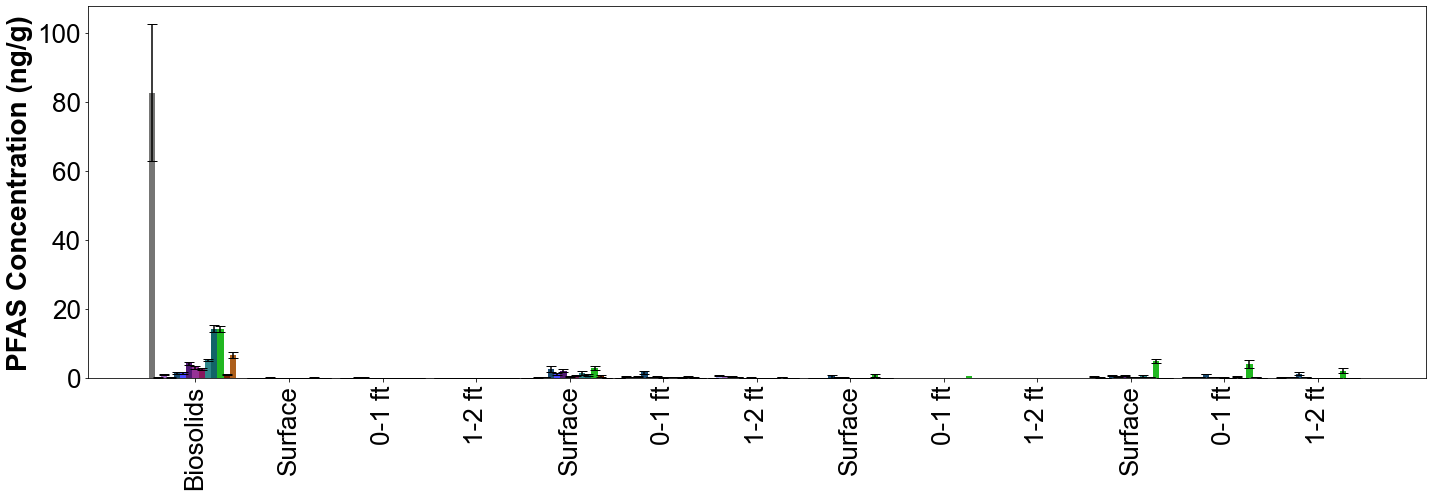

In [270]:
plot_pfas_by_depth(avg_all_pivot,error_all_pivot,pfas_colors_dict=compound_colors_dict_abbrev,figsize=(20,7))

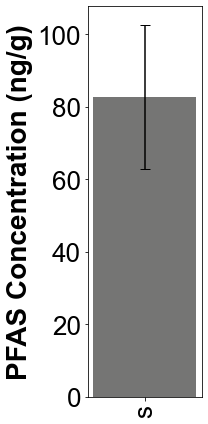

In [302]:
#plot_pfas_by_depth(avg_all_pivot,error_all_pivot,pfas_colors_dict=compound_colors_dict_abbrev,figsize=(20,7))
# Assuming 'df' is your DataFrame
selected_data = avg_all_pivot.loc[['5:3FTCA'], ('Biosolids',)]
selected_data_error = error_all_pivot.loc[['5:3FTCA'], ('Biosolids',)]
plot_pfas_by_depth(selected_data,selected_data_error,pfas_colors_dict=compound_colors_dict_abbrev,figsize=(3,6))



In [297]:
type(error_all_pivot.loc['5:3FTCA', 'Biosolids'])

pandas.core.series.Series

In [ ]:
error_all_pivot